# REPSOL CAPSTONE PROJECT EDA

This notebooks aims to make a basic EDA, clean and consolidate the databses needed to prepare the  REPSOL capstone project

dataframes used on this notebook:
1.- Consumption
2.- population
3.- matriculaciones
4.-GDP

### Imports (no tariff yet))

In [1]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import itertools
import seaborn as sns

## 1.- Gasoline and Diesel Consumption 

I have changed the dataset from cores to use the CNMC dataset that Jorge updated on his notebook. Next codes on acquiring such dataframe is his:

##### Import and consolidation

In [3]:

df_consumption = pd.read_excel('consumos-pp-ccaa-provincias.xlsx', sheet_name='Consumos',skiprows=5)




#### most basics EDA


In [4]:
df_consumption.head()

,Año,Mes,CCAA,Provincia,Gasolina 97 I.O.,Gasolina 95 I.O.,Gasolina 98 I.O.,% bio en gasolinas,Gasóleo A,Gasóleo B,Gasóleo C,% bio en gasóleos,Fuelóleo BIA
0,1997,enero,Andalucía,Almería,5097.523646,1291.230333,977.189782,NaN,15470.516968,4387.385165,1240.768692,NaN,25.996387
1,1997,enero,Andalucía,Cádiz,9319.528434,3611.667661,870.132646,NaN,13976.686039,5303.836145,1914.961884,NaN,5452.242218
2,1997,enero,Andalucía,Córdoba,6889.527207,2191.811304,880.746509,NaN,15428.954083,4138.672804,3591.476724,NaN,72.989855
3,1997,enero,Andalucía,Granada,8013.565478,2360.794488,1267.540167,NaN,15174.508125,3524.551522,11200.680642,NaN,0.000000
4,1997,enero,Andalucía,Huelva,4347.828462,1455.243424,646.016848,NaN,6944.043066,3435.564763,965.394008,NaN,271.962201


In [5]:
df_consumption.tail()

,Año,Mes,CCAA,Provincia,Gasolina 97 I.O.,Gasolina 95 I.O.,Gasolina 98 I.O.,% bio en gasolinas,Gasóleo A,Gasóleo B,Gasóleo C,% bio en gasóleos,Fuelóleo BIA
24331,2025,marzo,País Vasco,Álava,NaN,2690.31,117.82,0.020006,55848.57,3135.57,1252.54,0.037563,52.34
24332,2025,marzo,País Vasco,Guipúzcoa,NaN,6762.09,396.48,0.023528,65914.84,4064.39,274.53,0.062612,77.18
24333,2025,marzo,País Vasco,Vizcaya,NaN,8803.01,433.22,0.023615,30594.70,7869.98,5616.48,0.078746,211.16
24334,2025,marzo,País Vasco,Total,NaN,18255.41,947.52,0.023055,152358.11,15069.94,7143.55,0.056753,340.68
24335,2025,marzo,Total Nacional,Total,NaN,497007.84,27637.53,0.027510,1813024.70,310127.13,161064.58,0.065351,255719.83


In [6]:
df_consumption.shape

(24336, 13)

In [7]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  24336 non-null  int64  
 1   Mes                  24336 non-null  object 
 2   CCAA                 24336 non-null  object 
 3   Provincia            24336 non-null  object 
 4   Gasolina 97 I.O.     13248 non-null  float64
 5   Gasolina 95 I.O.     24336 non-null  float64
 6   Gasolina 98 I.O.     24336 non-null  float64
 7   % bio en  gasolinas  14064 non-null  float64
 8   Gasóleo A            24336 non-null  float64
 9   Gasóleo B            24336 non-null  float64
 10  Gasóleo C            24336 non-null  float64
 11  % bio en  gasóleos   15768 non-null  float64
 12  Fuelóleo BIA         24336 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 2.4+ MB


In [8]:
df_consumption.describe()

,Año,Gasolina 97 I.O.,Gasolina 95 I.O.,Gasolina 98 I.O.,% bio en gasolinas,Gasóleo A,Gasóleo B,Gasóleo C,% bio en gasóleos,Fuelóleo BIA
count,24336.000000,13248.000000,24336.000000,24336.000000,14064.000000,2.433600e+04,24336.000000,24336.000000,15768.000000,24336.000000
mean,2010.661243,5361.712319,17209.832999,2032.338453,0.046262,7.350621e+04,16058.753325,8116.004599,0.056796,9786.284140
std,8.144946,24398.373804,50280.630009,6563.116876,0.017872,2.108027e+05,46785.718677,28086.483615,0.027502,34137.594015
min,1997.000000,-0.482874,114.370000,0.000000,0.000000,4.371200e+02,-0.346358,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,2893.340607,214.040000,0.033313,1.733350e+04,4387.868791,749.279566,0.040142,160.147500
50%,2011.000000,751.590786,6145.891721,505.018158,0.044491,3.038441e+04,7242.998692,2189.945000,0.057704,973.090000
75%,2018.000000,3656.545543,13868.772500,1260.240296,0.062568,5.541400e+04,12035.735568,6234.269363,0.074412,4405.995650
max,2025.000000,481937.248000,614194.450000,102202.324000,0.107880,2.315079e+06,635836.250000,574564.092000,0.553205,989156.000000


In [9]:

print(df_consumption['Año'].unique())
print(df_consumption['Mes'].unique())

print(df_consumption['CCAA'].unique())
print(df_consumption['Provincia'].unique())

[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024
 2025]
['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']
['Andalucía' 'Aragón' 'Asturias' 'Baleares' 'Canarias' 'Cantabria'
 'Castilla y León' 'Castilla-La Mancha' 'Cataluña' 'Ceuta'
 'Comunidad Valenciana' 'Extremadura' 'Galicia' 'La Rioja' 'Madrid'
 'Melilla' 'Murcia' 'Navarra' 'País Vasco' 'Total Nacional']
['Almería' 'Cádiz' 'Córdoba' 'Granada' 'Huelva' 'Jaén' 'Málaga' 'Sevilla'
 'Total' 'Huesca' 'Teruel' 'Zaragoza' 'Asturias' 'Baleares' 'Canarias'
 'Cantabria' 'Ávila' 'Burgos' 'León' 'Palencia' 'Salamanca' 'Segovia'
 'Soria' 'Valladolid' 'Zamora' 'Albacete' 'Ciudad Real' 'Cuenca'
 'Guadalajara' 'Toledo' 'Barcelona' 'Gerona' 'Lérida' 'Tarragona' 'Ceuta'
 'Alicante' 'Castellón' 'Valencia' 'Badajoz' 'Cáceres' 'La Coruña' 'Lugo'
 'Orense' 'Pontevedra' 'La Rioja' 'Madrid' 'Melilla'

In [10]:
df_consumption.duplicated().sum()

0

In [11]:
df_consumption.isnull().sum()

Año                        0
Mes                        0
CCAA                       0
Provincia                  0
Gasolina 97 I.O.       11088
Gasolina 95 I.O.           0
Gasolina 98 I.O.           0
% bio en  gasolinas    10272
Gasóleo A                  0
Gasóleo B                  0
Gasóleo C                  0
% bio en  gasóleos      8568
Fuelóleo BIA               0
dtype: int64

#### What is the last year in which there is gasoline 97?

In [12]:
null_gas97 = df_consumption[df_consumption['Gasolina 97 I.O.'].isnull()]

first_year = null_gas97['Año'].iloc[0]
first_month = null_gas97['Mes'].iloc[0]

print(f"The last year and month with gas 97 data is: {first_year}, {first_month}")

The last year and month with gas 97 data is: 2007, enero


### Now we plot the different products at a national level,

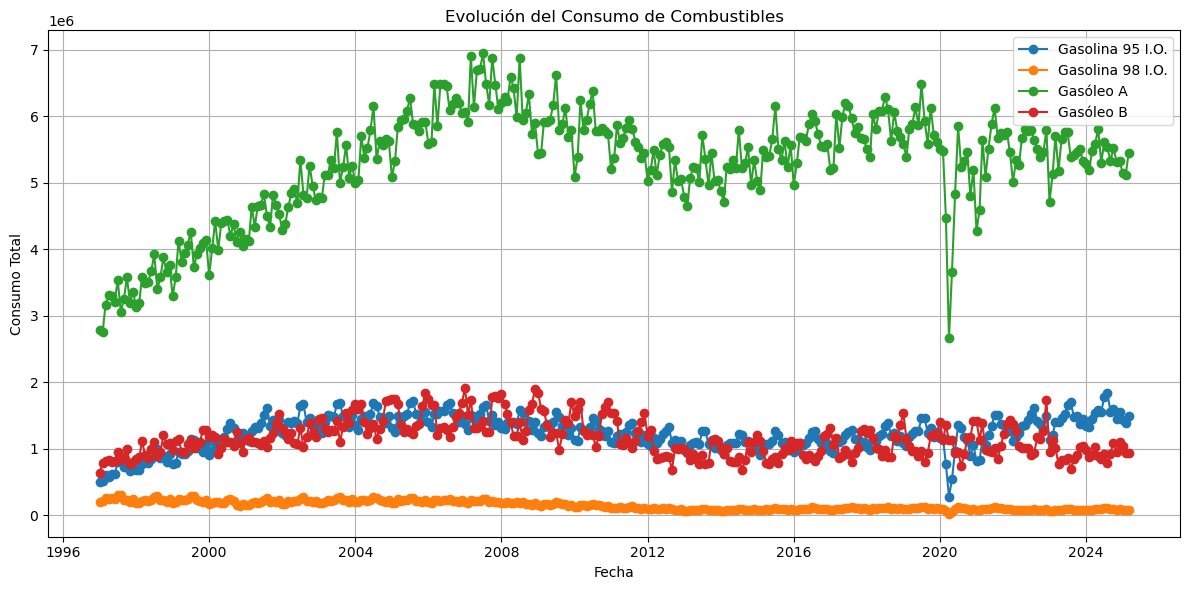

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean column names (remove trailing spaces)
df_consumption.columns = df_consumption.columns.str.strip()

# Step 2: Translate Spanish months to English
month_map = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

# Step 3: Normalize month names and create a Date column
df_consumption['Mes_normalized'] = df_consumption['Mes'].str.lower().map(month_map)
df_consumption['Date'] = pd.to_datetime(
    df_consumption['Año'].astype(str) + ' ' + df_consumption['Mes_normalized'] + ' 1',
    errors='coerce'  # avoids crash if some parsing fails
)

# Step 4: Define fuel columns (correct spelling after cleaning)
fuel_columns = ['Gasolina 95 I.O.', 'Gasolina 98 I.O.', 'Gasóleo A', 'Gasóleo B']

# Step 5: Ensure they're numeric
df_consumption[fuel_columns] = df_consumption[fuel_columns].apply(pd.to_numeric, errors='coerce')

# Step 6: Group by Date and sum
df_grouped = df_consumption.groupby('Date')[fuel_columns].sum().reset_index()

# Step 7: Plot
plt.figure(figsize=(12, 6))
for fuel in fuel_columns:
    plt.plot(df_grouped['Date'], df_grouped[fuel], marker='o', label=fuel)

plt.title('Evolución del Consumo de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo Total')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



### Autocorrelation
This is a timeseries, therfore we will check not only the correlation, on potential exogenous dataframes, but also the autocorrelation of values.


###### In code bellow we will see the autocorrelation graphical representation of the different variables. from a first glance it seems like most of the "potentially target variables" have some level of autocorrelation. Before deploying the model further test will be needed to makea first attempt on a SARIMAX model

##### Gasoline 95 RON

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\2903185430.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)


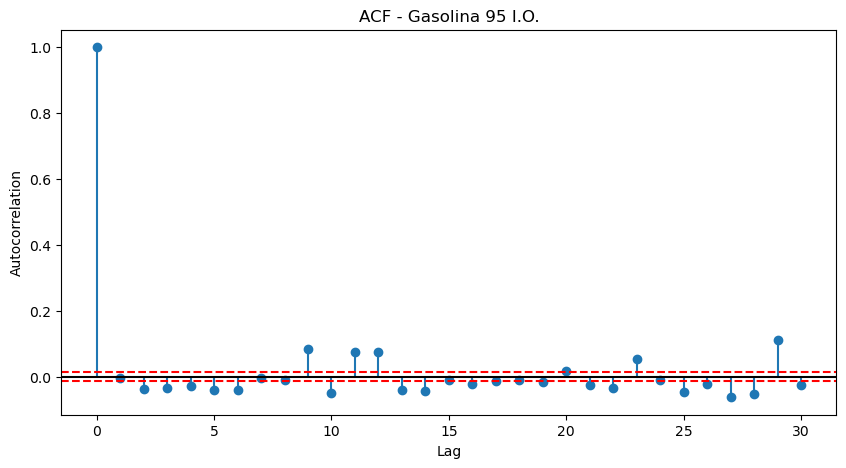

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\2903185430.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)


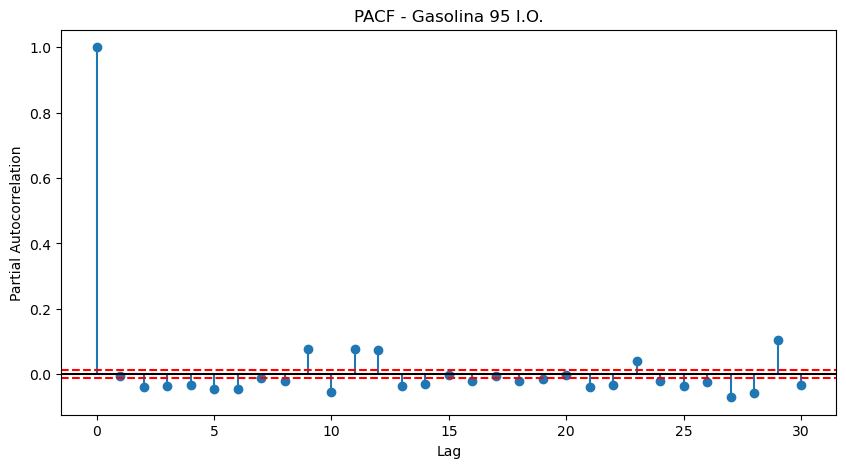

In [14]:
series = df_consumption['Gasolina 95 I.O.'].dropna()

lag_acf = acf(series, nlags=30, fft=False)
lag_pacf = pacf(series, nlags=30, method='ywm')
n = len(series)
conf_int = 1.96 / np.sqrt(n)
lags = np.arange(len(lag_acf))

plt.figure(figsize=(10,5))
plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('ACF - Gasolina 95 I.O.')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10,5))
plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('PACF - Gasolina 95 I.O.')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


##### Gasoline 98 RON


C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\3330032850.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)


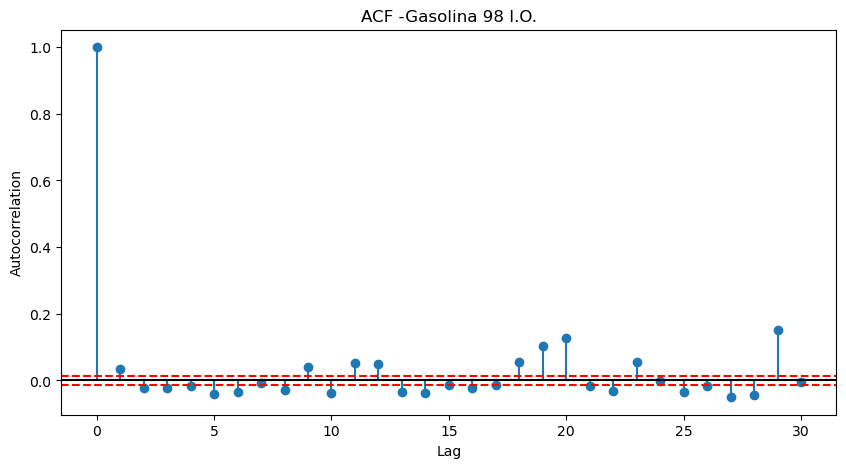

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\3330032850.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)


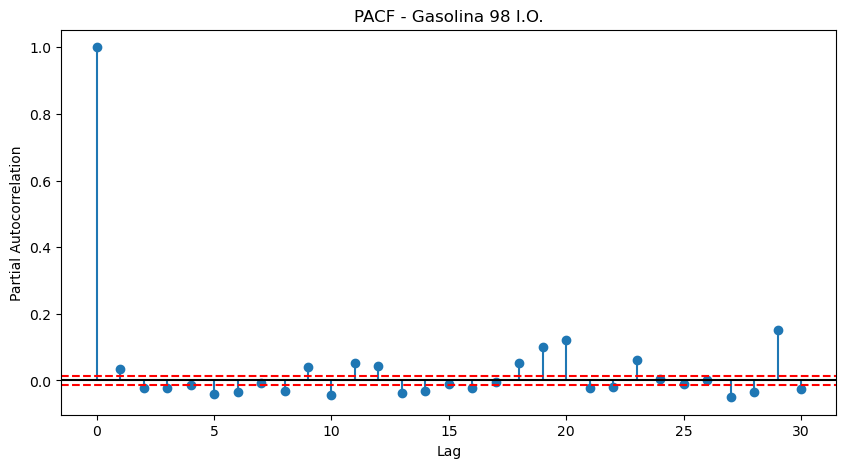

In [15]:
series = df_consumption['Gasolina 98 I.O.'].dropna()

lag_acf = acf(series, nlags=30, fft=False)
lag_pacf = pacf(series, nlags=30, method='ywm')
n = len(series)
conf_int = 1.96 / np.sqrt(n)
lags = np.arange(len(lag_acf))

plt.figure(figsize=(10,5))
plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('ACF -Gasolina 98 I.O.')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10,5))
plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('PACF - Gasolina 98 I.O.')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

##### Gasoleo A

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\2823257850.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)


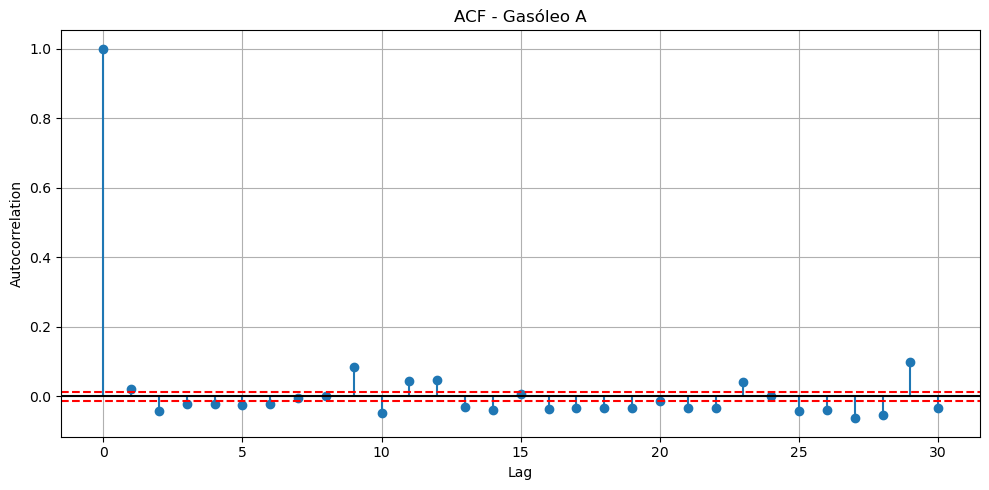

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\2823257850.py:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)


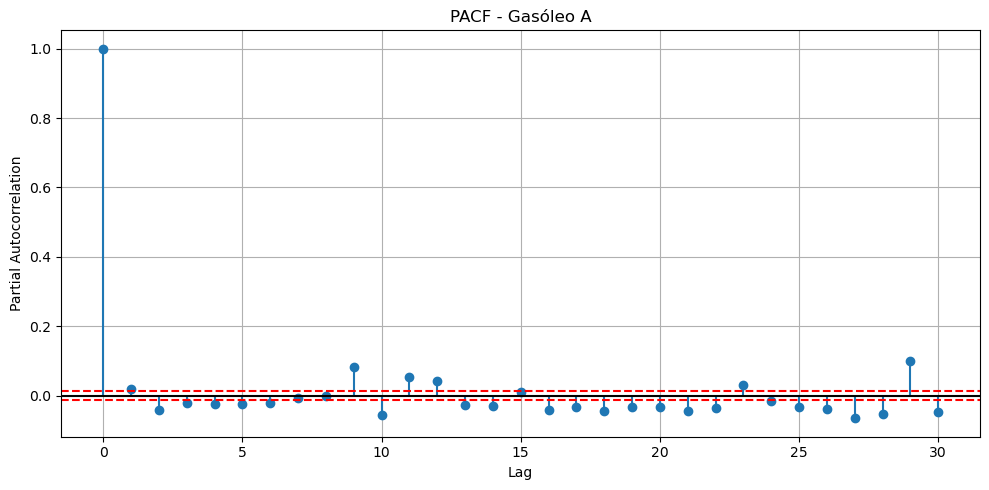

In [16]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import matplotlib.pyplot as plt

# Get the cleaned series
series = df_consumption['Gasóleo A'].dropna()

# Calculate ACF and PACF
lag_acf = acf(series, nlags=30, fft=False)
lag_pacf = pacf(series, nlags=30, method='ywm')
n = len(series)
conf_int = 1.96 / np.sqrt(n)
lags = np.arange(len(lag_acf))

# ACF plot
plt.figure(figsize=(10, 5))
plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('ACF - Gasóleo A')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

# PACF plot
plt.figure(figsize=(10, 5))
plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('PACF - Gasóleo A')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Gasóleo B

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\1004853211.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)


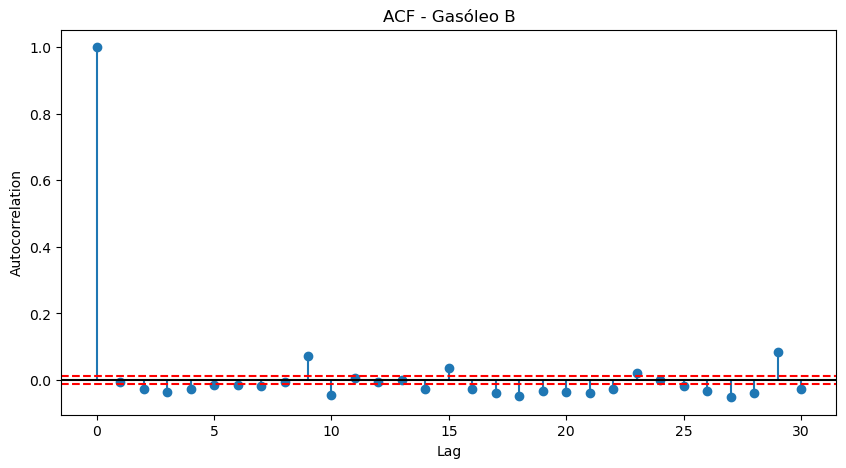

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\1004853211.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)


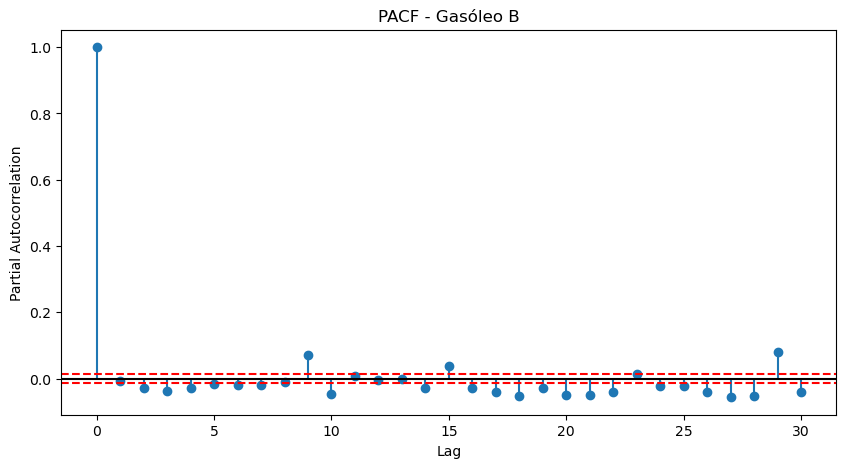

In [17]:
series = df_consumption['Gasóleo B'].dropna()

lag_acf = acf(series, nlags=30, fft=False)
lag_pacf = pacf(series, nlags=30, method='ywm')
n = len(series)
conf_int = 1.96 / np.sqrt(n)
lags = np.arange(len(lag_acf))

plt.figure(figsize=(10,5))
plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('ACF - Gasóleo B')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10,5))
plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('PACF - Gasóleo B')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


## 1.-conclusions/ highlights:
On this dataframe we have information about the consumption of each gasoline and gasoil product in spain.
% biofuel is left in case needed but has not been taged by work team as a taeget variable

starting data: january 1997

ending data: febrary 2025

granularity: monthly

regionality: comunidad(region), province, municipio

Coment:
From January 2007 we have a split on the data. On that year we stop having gasoline 97 and start having information about biofuels.


## 2.- HVO Consumption 

##### Import and consolidation

In [18]:
df_HVO = pd.read_excel('HVO España.xlsx')

#### most basics EDA

In [19]:
df_HVO.head()

,Año,Mes,HVO
0,2007,1,0.0
1,2007,2,0.0
2,2007,3,0.0
3,2007,4,0.0
4,2007,5,0.0


In [20]:
df_HVO.tail()

,Año,Mes,HVO
211,2024,8,49786.17616
212,2024,9,41030.20817
213,2024,10,51084.43533
214,2024,11,44553.39898
215,2024,12,26692.76860


In [21]:
df_HVO.shape



(216, 3)

In [22]:
df_HVO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Año     216 non-null    int64  
 1   Mes     216 non-null    int64  
 2   HVO     216 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.2 KB


In [23]:
df_HVO.describe()

,Año,Mes,HVO
count,216.000000,216.000000,216.000000
mean,2015.500000,6.500000,26663.899514
std,5.200179,3.460071,22757.007251
min,2007.000000,1.000000,0.000000
25%,2011.000000,3.750000,6880.053750
50%,2015.500000,6.500000,25792.696500
75%,2020.000000,9.250000,37628.945750
max,2024.000000,12.000000,112230.210000


In [24]:
print(df_HVO['Año'].unique())
print(df_HVO['Mes'].unique())

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [25]:
df_HVO.duplicated().sum()

0

In [26]:
df_HVO.isnull().sum()

Año    0
Mes    0
HVO    0
dtype: int64

In [27]:
first_positive_row = df_HVO[df_HVO['HVO'] > 0].sort_values(['Año', 'Mes']).head(1)

print("First period with HVO > 0:")
print(first_positive_row)


First period with HVO > 0:
     Año  Mes       HVO
54  2011    7  9173.405


### Visual plot of the df

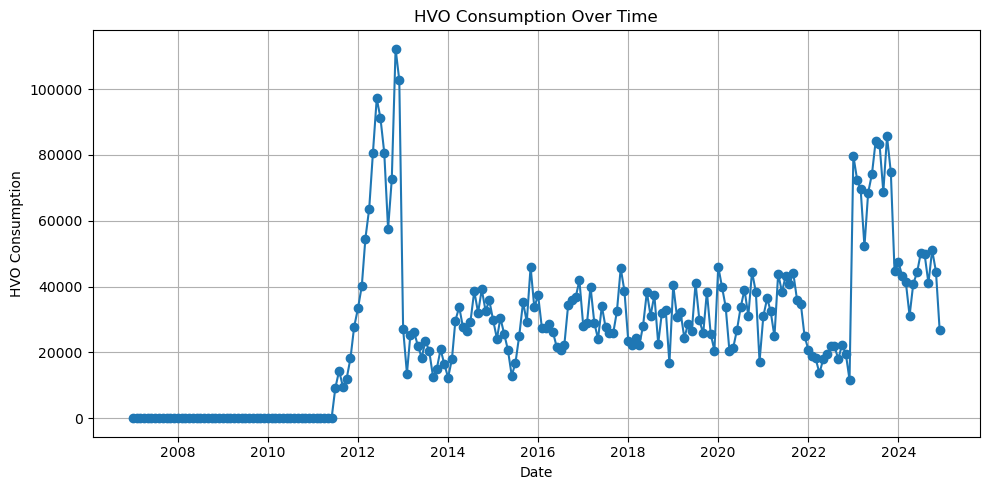

In [28]:

# Rename columns to match datetime keywords
df_HVO = df_HVO.rename(columns={'Año': 'year', 'Mes': 'month'})

# Create a datetime column
df_HVO['Date'] = pd.to_datetime(df_HVO[['year', 'month']].assign(day=1))

# Sort by date
df_HVO = df_HVO.sort_values('Date')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_HVO['Date'], df_HVO['HVO'], marker='o', linestyle='-')
plt.title('HVO Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('HVO Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()



### Autocorrelation

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\4035173151.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)


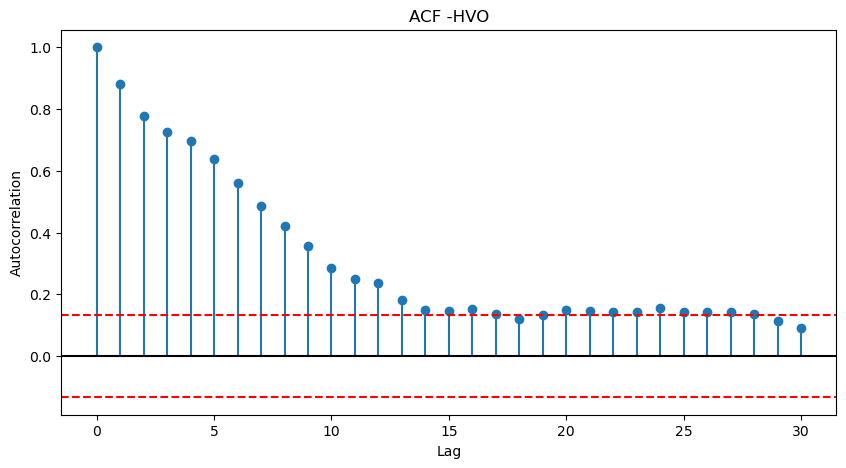

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\4035173151.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)


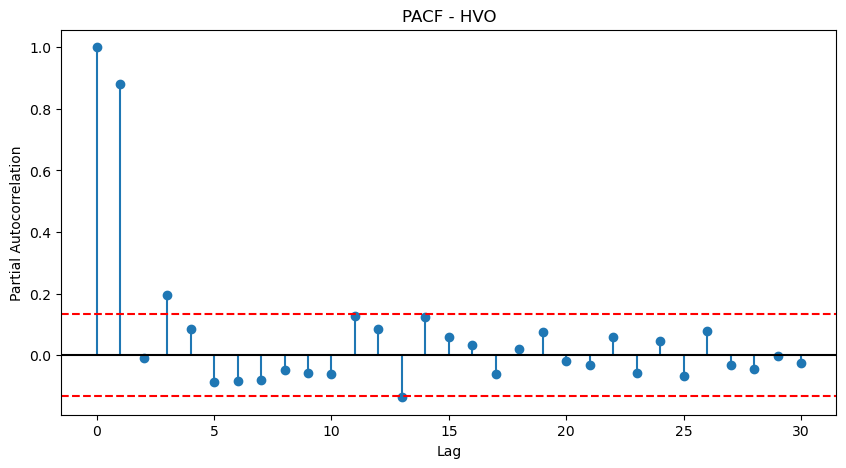

In [29]:
series = df_HVO['HVO'].dropna()

lag_acf = acf(series, nlags=30, fft=False)
lag_pacf = pacf(series, nlags=30, method='ywm')
n = len(series)
conf_int = 1.96 / np.sqrt(n)
lags = np.arange(len(lag_acf))

plt.figure(figsize=(10,5))
plt.stem(lags, lag_acf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('ACF -HVO')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10,5))
plt.stem(lags, lag_pacf, basefmt=" ", use_line_collection=True)
plt.axhline(y=conf_int, linestyle='--', color='red')
plt.axhline(y=-conf_int, linestyle='--', color='red')
plt.axhline(y=0, linestyle='-', color='black')
plt.title('PACF - HVO')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


## 2.- Conclusions/ highlights
This dataframe contains the data of the consumption of HVO nationally

starting data:2011-07

ending data:2024-12

granularity: monthly

regionality: national



###  import and consolidation

In [30]:
#### FIRST WE COMBINE THE DIFFERENT EXCELL FILES

folder_path = 'pob_mun_en'

all_dfs = []

# List all Excel files in the folder
files = os.listdir(folder_path)

for file in files:
    if file.endswith('.xlsx') and file.startswith('pobmun'):
        # Example: pobmun00.xlsx → extract '00'
        year_suffix = file[6:8]
        
        # Convert to year
        year_suffix_int = int(year_suffix)
        if year_suffix_int <= 25:  # Files like pobmun00 to pobmun25 are 2000-2025
            year = 2000 + year_suffix_int
        else:                      # Files like pobmun96 to pobmun99 are 1996-1999
            year = 1900 + year_suffix_int
        
        # Full path to file
        file_path = os.path.join(folder_path, file)
        
        # Read the file, skipping the first row
        df_year = pd.read_excel(file_path, skiprows=1)
        
        # Add a new column 'Year'
        df_year['Year'] = year
        
        # Append to the list
        all_dfs.append(df_year)

# Combine all into a single DataFrame
df_combined = pd.concat(all_dfs, ignore_index=True)
df_combined.head()

,CPRO,PROVINCIA,CMUN,NOMBRE,POB14,HOMBRES,MUJERES,Year,POB15,POB16,POB17,POB18,POB19,POB20,POB21,POB22,POB23,TOTAL,VARONES
0,2.0,Albacete,1.0,Abengibre,775.0,383.0,392.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Albacete,2.0,Alatoz,580.0,323.0,257.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Albacete,3.0,Albacete,172487.0,84399.0,88088.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,Albacete,4.0,Albatana,748.0,380.0,368.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,Albacete,5.0,Alborea,778.0,402.0,376.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Im renaming the df because I will use it later and want to make clear when using afterwards
df_population = df_combined 
df_population.head()

,CPRO,PROVINCIA,CMUN,NOMBRE,POB14,HOMBRES,MUJERES,Year,POB15,POB16,POB17,POB18,POB19,POB20,POB21,POB22,POB23,TOTAL,VARONES
0,2.0,Albacete,1.0,Abengibre,775.0,383.0,392.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Albacete,2.0,Alatoz,580.0,323.0,257.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Albacete,3.0,Albacete,172487.0,84399.0,88088.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,Albacete,4.0,Albatana,748.0,380.0,368.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,Albacete,5.0,Alborea,778.0,402.0,376.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Rename different columns for clarity
df_population = df_population.rename(columns={'NOMBRE': 'MUNICIPIO'})
df_population = df_population.rename(columns={'Year': 'YEAR'})
# Check result
df_population.head()


,CPRO,PROVINCIA,CMUN,MUNICIPIO,POB14,HOMBRES,MUJERES,YEAR,POB15,POB16,POB17,POB18,POB19,POB20,POB21,POB22,POB23,TOTAL,VARONES
0,2.0,Albacete,1.0,Abengibre,775.0,383.0,392.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Albacete,2.0,Alatoz,580.0,323.0,257.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Albacete,3.0,Albacete,172487.0,84399.0,88088.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,Albacete,4.0,Albatana,748.0,380.0,368.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,Albacete,5.0,Alborea,778.0,402.0,376.0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_population = df_population.set_index('YEAR')
df_population.head()

,CPRO,PROVINCIA,CMUN,MUNICIPIO,POB14,HOMBRES,MUJERES,POB15,POB16,POB17,POB18,POB19,POB20,POB21,POB22,POB23,TOTAL,VARONES
YEAR,,,,,,,,,,,,,,,,,,
2014,2.0,Albacete,1.0,Abengibre,775.0,383.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,2.0,Albacete,2.0,Alatoz,580.0,323.0,257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,2.0,Albacete,3.0,Albacete,172487.0,84399.0,88088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,2.0,Albacete,4.0,Albatana,748.0,380.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,2.0,Albacete,5.0,Alborea,778.0,402.0,376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
### Unifying column names and checking the null values

df_population['VARONES'] = df_population['VARONES'].fillna(df_population['HOMBRES'])
df_population = df_population.drop(columns=['HOMBRES'])
df_population.isnull().sum()

CPRO             1
PROVINCIA     8098
CMUN             1
MUNICIPIO        1
POB14        81245
MUJERES       8131
POB15        81243
POB16        81236
POB17        81238
POB18        81238
POB19        81231
POB20        81231
POB21        81231
POB22        81231
POB23        81231
TOTAL        81265
VARONES       8131
dtype: int64

In [35]:
### there are missing values because some excell files contained province codes but not province names, Im completting that info
# Create a mapping from CPRO to provincia (only where provincia is not null)
cpro_to_provincia = df_population.dropna(subset=['PROVINCIA']).drop_duplicates(subset=['CPRO']).set_index('CPRO')['PROVINCIA'].to_dict()


In [36]:
# Fill missing provincia based on CPRO mapping
df_population['PROVINCIA'] = df_population.apply(
    lambda row: cpro_to_provincia[row['CPRO']] if pd.isnull(row['PROVINCIA']) and row['CPRO'] in cpro_to_provincia else row['PROVINCIA'],
    axis=1
)


In [37]:
### The total column was named differently on each exel so instead of merging all columns which was being tedious and giving errors I just added each gender
# Create a new column 'TOTAL' as the sum of 'mujeres' and 'varones'
df_population['TOTAL'] = df_population['MUJERES'] + df_population['VARONES']



In [38]:
### for excel in year 2021 we are not given the values by male or female, intead we are given totals so we have to manually introduce that yeat into the total column
df_population['TOTAL'] = df_population['TOTAL'].fillna(df_population['POB21'])
df_population.isnull().sum()

CPRO             1
PROVINCIA        1
CMUN             1
MUNICIPIO        1
POB14        81245
MUJERES       8131
POB15        81243
POB16        81236
POB17        81238
POB18        81238
POB19        81231
POB20        81231
POB21        81231
POB22        81231
POB23        81231
TOTAL            0
VARONES       8131
dtype: int64

In [39]:
###now we drop POB columns that we didnt use or already consolidated in total

# Find all columns that start with 'POB'
pob_columns = [col for col in df_population.columns if col.startswith('POB')]

# Drop those columns
df_population = df_population.drop(columns=pob_columns)



In [40]:
### there is a row with missing values, on year 2016 there was a summary column that was giving us issues as it showed missing values. We dropped it

# Build the condition
condition = (
    (df_population['MUJERES'] == 23713398.0) &
    (df_population['TOTAL'] == 46557008.0) &
    (df_population['VARONES'] == 22843610.0)
)

# Drop the matching rows
df_population = df_population.drop(df_population[condition].index)


df_population.isnull().sum()



CPRO            0
PROVINCIA       0
CMUN            0
MUNICIPIO       0
MUJERES      8131
TOTAL           0
VARONES      8131
dtype: int64

In [41]:
#Im dropping redundant meaningless variables
df_population.drop(columns=['CPRO', 'CMUN'], inplace=True)


In [42]:
df_population['PROVINCIA'].unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ciudad Real', 'Córdoba', 'Coruña, A',
       'Cuenca', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara', 'Huelva',
       'Huesca', 'Jaén', 'León', 'Lleida', 'Lugo', 'Madrid', 'Málaga',
       'Murcia', 'Navarra', 'Ourense', 'Palencia', 'Palmas, Las',
       'Pontevedra', 'Rioja, La', 'Salamanca', 'Santa Cruz de Tenerife',
       'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo',
       'Valencia/València', 'Valladolid', 'Zamora', 'Zaragoza', 'Ceuta',
       'Melilla'], dtype=object)

In [43]:
# Mapping dictionary: province → region
province_to_region = {
    # Andalucía
    'Almería': 'Andalucía', 'Cádiz': 'Andalucía', 'Córdoba': 'Andalucía', 
    'Granada': 'Andalucía', 'Huelva': 'Andalucía', 'Jaén': 'Andalucía', 
    'Málaga': 'Andalucía', 'Sevilla': 'Andalucía',

    # Aragón
    'Huesca': 'Aragón', 'Teruel': 'Aragón', 'Zaragoza': 'Aragón',

    # Asturias
    'Asturias': 'Asturias',

    # Balears
    'Balears, Illes': 'Balears',

    # Canarias
    'Palmas, Las': 'Canarias', 'Santa Cruz de Tenerife': 'Canarias',

    # Cantabria
    'Cantabria': 'Cantabria',

    # Castilla - La Mancha
    'Albacete': 'Castilla - La Mancha', 'Ciudad Real': 'Castilla - La Mancha',
    'Cuenca': 'Castilla - La Mancha', 'Guadalajara': 'Castilla - La Mancha', 
    'Toledo': 'Castilla - La Mancha',

    # Castilla y León
    'Ávila': 'Castilla y León', 'Burgos': 'Castilla y León', 'León': 'Castilla y León',
    'Palencia': 'Castilla y León', 'Salamanca': 'Castilla y León', 'Segovia': 'Castilla y León',
    'Soria': 'Castilla y León', 'Valladolid': 'Castilla y León', 'Zamora': 'Castilla y León',

    # Cataluña
    'Barcelona': 'Cataluña', 'Girona': 'Cataluña', 'Lleida': 'Cataluña', 'Tarragona': 'Cataluña',

    # Ceuta
    'Ceuta': 'Ceuta',

    # Comunitat Valenciana
    'Alicante/Alacant': 'Comunitat Valenciana',
    'Castellón/Castelló': 'Comunitat Valenciana',
    'Valencia/València': 'Comunitat Valenciana',

    # Extremadura
    'Badajoz': 'Extremadura', 'Cáceres': 'Extremadura',

    # Galicia
    'Coruña, A': 'Galicia', 'Lugo': 'Galicia', 'Ourense': 'Galicia', 'Pontevedra': 'Galicia',

    # Madrid
    'Madrid': 'Madrid',

    # Melilla
    'Melilla': 'Melilla',

    # Murcia
    'Murcia': 'Murcia',

    # Navarra
    'Navarra': 'Navarra',

    # País Vasco
    'Araba/Álava': 'País Vasco', 'Bizkaia': 'País Vasco', 'Gipuzkoa': 'País Vasco',

    # Rioja
    'Rioja, La': 'Rioja',
}

# Apply the mapping
df_population['region'] = df_population['PROVINCIA'].map(province_to_region)


In [44]:
unmatched = df_population[df_population['region'].isna()]['PROVINCIA'].unique()
print("Unmatched provinces:", unmatched)


Unmatched provinces: []


In [45]:
# Group by region and sum the numeric columns
df_population = (
    df_population
    .groupby(['region', 'YEAR'])[['MUJERES', 'VARONES', 'TOTAL']]
    .sum()
    .reset_index()
)

# Preview result
print(df_population.head())


      region  YEAR    MUJERES    VARONES      TOTAL
0  Andalucía  1996  3675437.0  3559436.0  7234873.0
1  Andalucía  2014  4253604.0  4148701.0  8402305.0
2  Andalucía  2015  4254511.0  4144532.0  8399043.0
3  Andalucía  2017  4245985.0  4133835.0  8379820.0
4  Andalucía  2018  4250510.0  4133898.0  8384408.0


In [46]:
df_population = df_population.rename(columns={'TOTAL': 'TOTAL_POPULATION'})


### Population EDA
Now that we have finally consolidated the population df we will procceed to study it

We already now from the clear and consolidation step that there are only null values for year 2021 in columns VARONES and MUJERES since we were not given values separated by gender for those years.


#### basic EDA

In [47]:
df_population.head()


,region,YEAR,MUJERES,VARONES,TOTAL_POPULATION
0,Andalucía,1996,3675437.0,3559436.0,7234873.0
1,Andalucía,2014,4253604.0,4148701.0,8402305.0
2,Andalucía,2015,4254511.0,4144532.0,8399043.0
3,Andalucía,2017,4245985.0,4133835.0,8379820.0
4,Andalucía,2018,4250510.0,4133898.0,8384408.0


In [48]:
df_population.tail()

,region,YEAR,MUJERES,VARONES,TOTAL_POPULATION
185,Rioja,2019,160619.0,156179.0,316798.0
186,Rioja,2020,162079.0,157835.0,319914.0
187,Rioja,2021,0.0,0.0,319796.0
188,Rioja,2022,162041.0,157851.0,319892.0
189,Rioja,2023,163348.0,159142.0,322490.0


In [49]:
df_population.shape

(190, 5)

In [50]:
df_population.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            190 non-null    object 
 1   YEAR              190 non-null    int64  
 2   MUJERES           190 non-null    float64
 3   VARONES           190 non-null    float64
 4   TOTAL_POPULATION  190 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.6+ KB


In [51]:
df_population.describe()

,YEAR,MUJERES,VARONES,TOTAL_POPULATION
count,190.00000,1.900000e+02,1.900000e+02,1.900000e+02
mean,2016.50000,1.117105e+06,1.074132e+06,2.440633e+06
std,7.38492,1.246468e+06,1.193476e+06,2.460140e+06
min,1996.00000,0.000000e+00,0.000000e+00,5.957600e+04
25%,2015.00000,2.774900e+05,2.636795e+05,6.621820e+05
50%,2018.50000,6.641950e+05,6.482945e+05,1.486204e+06
75%,2021.00000,1.246964e+06,1.213525e+06,2.696044e+06
max,2023.00000,4.349958e+06,4.218555e+06,8.568513e+06


In [52]:
first_year = df_population['YEAR'].min()
last_year = df_population['YEAR'].max()

print(f"📅 First year in dataset: {first_year}")
print(f"📅 Last year in dataset: {last_year}")

📅 First year in dataset: 1996
📅 Last year in dataset: 2023


### data plot

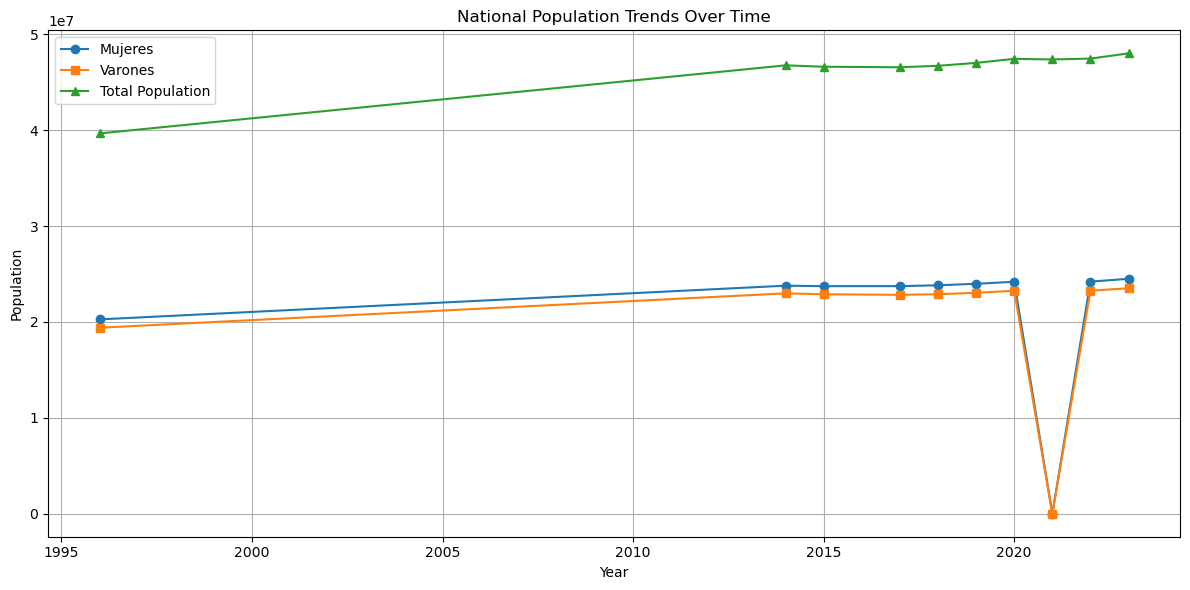

In [53]:
df_national = df_population.groupby('YEAR')[['MUJERES', 'VARONES', 'TOTAL_POPULATION']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_national['YEAR'], df_national['MUJERES'], label='Mujeres', marker='o')
plt.plot(df_national['YEAR'], df_national['VARONES'], label='Varones', marker='s')
plt.plot(df_national['YEAR'], df_national['TOTAL_POPULATION'], label='Total Population', marker='^')

plt.title('National Population Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### correlation with consumption dataframe
firts we will join both dataframes and them check correlation between variables

In [54]:
df_HVO.head()

,year,month,HVO,Date
0,2007,1,0.0,2007-01-01
1,2007,2,0.0,2007-02-01
2,2007,3,0.0,2007-03-01
3,2007,4,0.0,2007-04-01
4,2007,5,0.0,2007-05-01


In [55]:
# Rename columns for consistency
df_population['CCAA'] = df_population['region']
df_population['Año'] = df_population['YEAR']
df_HVO['Año'] = df_HVO['year']

# Merge df_consumption with df_population on 'CCAA' and 'Año'
df_merged_year = pd.merge(df_consumption, df_population, on=['CCAA', 'Año'])

# Merge the result with df_HVO on 'Año' and 'Mes'
df_merged_year = pd.merge(df_merged_year, df_HVO, on=['Año'], how='left')

# Preview the final merged DataFrame
df_merged_year.head()


,Año,Mes,CCAA,Provincia,Gasolina 97 I.O.,Gasolina 95 I.O.,Gasolina 98 I.O.,% bio en gasolinas,Gasóleo A,Gasóleo B,...,Date_x,region,YEAR,MUJERES,VARONES,TOTAL_POPULATION,year,month,HVO,Date_y
0,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,2014-01-01,Andalucía,2014,4253604.0,4148701.0,8402305.0,2014,1,12352.829,2014-01-01
1,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,2014-01-01,Andalucía,2014,4253604.0,4148701.0,8402305.0,2014,2,17969.210,2014-02-01
2,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,2014-01-01,Andalucía,2014,4253604.0,4148701.0,8402305.0,2014,3,29689.166,2014-03-01
3,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,2014-01-01,Andalucía,2014,4253604.0,4148701.0,8402305.0,2014,4,33791.779,2014-04-01
4,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,2014-01-01,Andalucía,2014,4253604.0,4148701.0,8402305.0,2014,5,27714.114,2014-05-01


In [56]:
# Select only the relevant columns
correlation_columns = ['Gasolina 95 I.O.', 'Gasolina 98 I.O.', 'Gasóleo A', 'Gasóleo B','MUJERES','VARONES','TOTAL_POPULATION']
correlation_matrix = df_merged_year[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                  Gasolina 95 I.O.  Gasolina 98 I.O.  Gasóleo A  Gasóleo B  \
Gasolina 95 I.O.          1.000000          0.629793   0.913752   0.630897   
Gasolina 98 I.O.          0.629793          1.000000   0.427100   0.170202   
Gasóleo A                 0.913752          0.427100   1.000000   0.787643   
Gasóleo B                 0.630897          0.170202   0.787643   1.000000   
MUJERES                   0.367150          0.101031   0.345626   0.211207   
VARONES                   0.359238          0.099237   0.339064   0.210125   
TOTAL_POPULATION          0.418602          0.121537   0.388721   0.255083   

                   MUJERES   VARONES  TOTAL_POPULATION  
Gasolina 95 I.O.  0.367150  0.359238          0.418602  
Gasolina 98 I.O.  0.101031  0.099237          0.121537  
Gasóleo A         0.345626  0.339064          0.388721  
Gasóleo B         0.211207  0.210125          0.255083  
MUJERES           1.000000  0.999703          0.875861  
VARONES           0.999703  1.000

In [57]:
import seaborn as sns


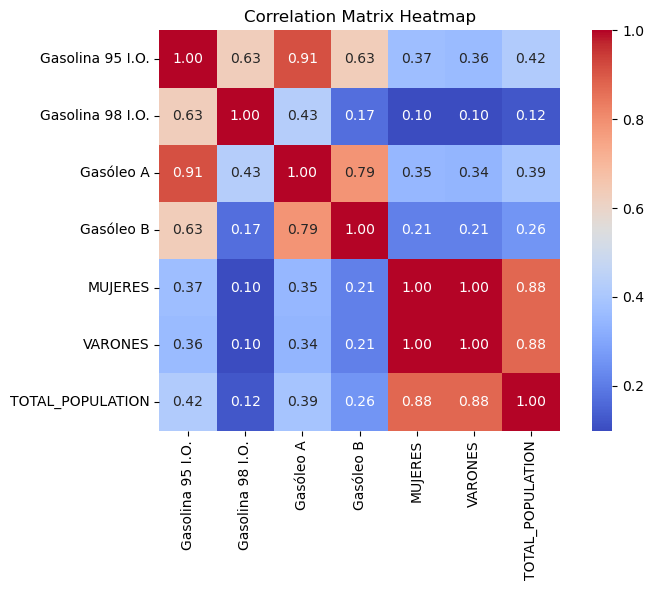

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

In [59]:
df_merged_year['Gasoline 95']=df_merged_year['Gasolina 95 I.O.']
df_merged_year['Gasoline 98']=df_merged_year['Gasolina 98 I.O.']
df_merged_year['Diesel A']=df_merged_year['Gasóleo A']
df_merged_year['Diesel B']=df_merged_year['Gasóleo B']


             Gasoline 95  Gasoline 98  Diesel A  Diesel B       HVO
Gasoline 95     1.000000     0.629793  0.913752  0.630897  0.034339
Gasoline 98     0.629793     1.000000  0.427100  0.170202 -0.009790
Diesel A        0.913752     0.427100  1.000000  0.787643 -0.004685
Diesel B        0.630897     0.170202  0.787643  1.000000 -0.029876
HVO             0.034339    -0.009790 -0.004685 -0.029876  1.000000


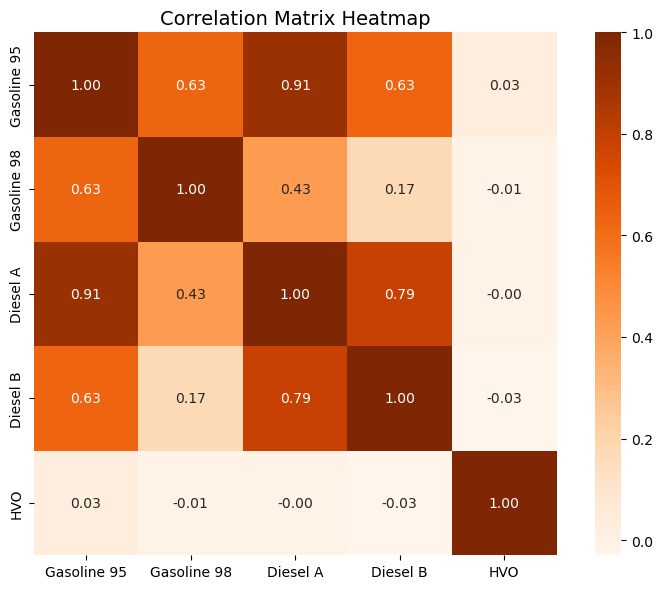

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the relevant columns
correlation_columns = ['Gasoline 95', 'Gasoline 98', 'Diesel A', 'Diesel B','HVO']
correlation_matrix = df_merged_year[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap using orange tones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Oranges", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


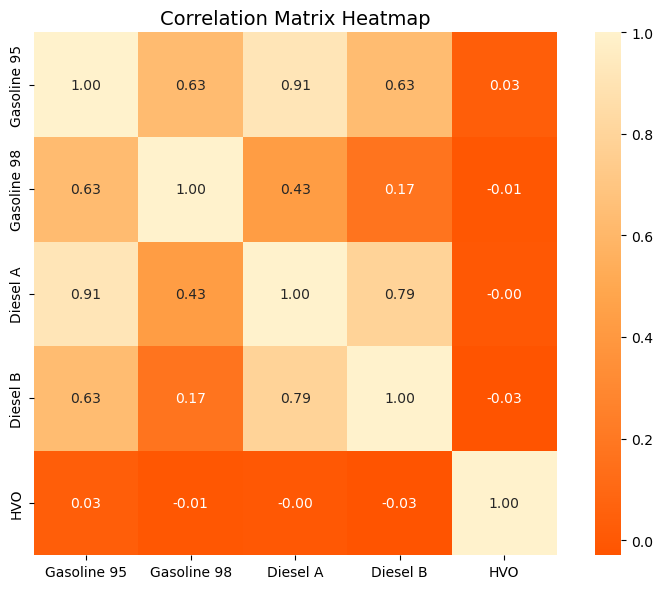

In [61]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom Repsol-like color palette
repsol_colors = LinearSegmentedColormap.from_list(
    "repsol_oranges", ["#ff5400", "#ffa64d", "#fff2cc"]
)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=repsol_colors, fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


## 3.- Matriculaciones dataset

#### Import

In [62]:
df_matriculaciones = pd.read_excel('matriculaciones.xlsx')


### Basic EDA

In [63]:
df_matriculaciones.head()

,Año,Comunidad,Mes,Autobuses_gasolina,Autobuses_gasoil,Turismos_gasolina,Turismos_gasoil,Motocicletas_gasolina,Motocicletas_gasoil,Tractores Industriales_gasolina,Tractores Industriales_gasoil,Otros vehículos_gasolina,Otros vehículos_gasoil,Camiones y Furgonetas_gasolina,Camiones y Furgonetas_gasoil,Total_gasolina,Total_gasoil
0,1999,Andalucía,Enero,0.0,28.7820,6926.131889,7217.490511,422.5788,0.0,0.0,204.2784,1.558922,24.123478,208.465089,2643.314511,7648.718302,10028.005298
1,1999,Andalucía,Febrero,0.0,30.1104,7859.624473,8190.251927,387.5976,0.0,0.0,149.8140,1.532044,23.707556,227.238923,2881.364677,8610.228760,11288.612840
2,1999,Andalucía,Marzo,0.0,39.4092,9923.860997,10341.323803,520.1424,0.0,0.0,170.7732,2.230871,34.521529,259.100494,3285.365906,10570.483859,13858.644541
3,1999,Andalucía,Abril,0.0,38.3760,8409.962261,8763.740539,635.2704,0.0,0.0,169.8876,2.275667,35.214733,245.613544,3114.352856,9266.137921,12148.555679
4,1999,Andalucía,Mayo,0.0,35.1288,8548.739324,8908.355476,700.2144,0.0,0.0,174.4632,1.988969,30.778231,245.764598,3116.268202,9416.288109,12345.413091


In [64]:
df_matriculaciones.tail()

,Año,Comunidad,Mes,Autobuses_gasolina,Autobuses_gasoil,Turismos_gasolina,Turismos_gasoil,Motocicletas_gasolina,Motocicletas_gasoil,Tractores Industriales_gasolina,Tractores Industriales_gasoil,Otros vehículos_gasolina,Otros vehículos_gasoil,Camiones y Furgonetas_gasolina,Camiones y Furgonetas_gasoil,Total_gasolina,Total_gasoil
5611,2024,País Vasco,Agosto,0.0,4.7684,1276.130791,326.444609,419.372784,0.167816,0.0,27.2218,0.053121,21.195079,28.011311,260.765089,1691.062761,673.068039
5612,2024,País Vasco,Septiembre,0.0,21.3530,1727.127559,441.813241,543.694435,0.217565,0.0,49.7014,0.041134,16.412466,38.169287,355.328513,2284.567057,909.291543
5613,2024,País Vasco,Octubre,0.0,10.0870,1984.223047,507.580353,556.317784,0.222616,0.0,95.5776,0.059802,23.860799,47.071811,438.204589,2620.290823,1042.914577
5614,2024,País Vasco,Noviembre,0.0,8.5412,1940.660978,496.436822,456.011922,0.182478,0.0,66.3384,0.045981,18.346419,43.429985,404.301815,2456.551929,977.744071
5615,2024,País Vasco,Diciembre,0.0,5.2138,2382.999576,609.590624,596.413939,0.238661,0.0,41.7628,0.040086,15.994314,45.544429,423.985771,2948.312095,1173.471905


In [65]:
df_matriculaciones.shape

(5616, 17)

In [66]:
df_matriculaciones.describe()

,Año,Autobuses_gasolina,Autobuses_gasoil,Turismos_gasolina,Turismos_gasoil,Motocicletas_gasolina,Motocicletas_gasoil,Tractores Industriales_gasolina,Tractores Industriales_gasoil,Otros vehículos_gasolina,Otros vehículos_gasoil,Camiones y Furgonetas_gasolina,Camiones y Furgonetas_gasoil,Total_gasolina,Total_gasoil
count,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000
mean,2011.500000,0.024751,14.967527,2568.742317,3085.892688,702.688470,0.452264,0.035143,79.423552,0.596440,24.056038,54.470880,972.705456,3321.812778,4178.567632
std,7.500668,0.078691,21.156005,3651.375770,4113.931263,1031.860660,1.063098,0.127362,110.631615,1.159949,42.222329,81.796686,1303.132348,4607.712157,5496.472916
min,1999.000000,0.000000,0.140000,8.735184,5.060116,2.501842,0.000000,0.000000,1.130434,0.000698,0.124002,0.385694,5.431706,14.283371,9.661929
25%,2005.000000,0.000000,3.214086,558.616183,598.456625,144.159304,0.000000,0.000000,17.078137,0.062592,4.153955,8.715185,201.105542,747.680020,891.722869
50%,2011.500000,0.000868,7.237600,1246.042797,1516.585453,324.580200,0.082610,0.000000,39.515550,0.172200,9.989360,24.500519,443.703942,1657.286687,2003.543297
75%,2018.000000,0.014357,15.516261,2605.029308,3280.562423,728.371087,0.397953,0.000000,78.592825,0.591805,24.998062,55.743457,1104.777325,3273.964058,4556.283934
max,2024.000000,1.309934,294.133500,32825.364392,25974.062990,8468.377893,11.708589,2.000483,1316.563200,11.869795,506.143634,659.362496,8405.771808,40612.436456,34581.806528


In [67]:
df_matriculaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Año                              5616 non-null   int64  
 1   Comunidad                        5616 non-null   object 
 2   Mes                              5616 non-null   object 
 3   Autobuses_gasolina               5616 non-null   float64
 4   Autobuses_gasoil                 5616 non-null   float64
 5   Turismos_gasolina                5616 non-null   float64
 6   Turismos_gasoil                  5616 non-null   float64
 7   Motocicletas_gasolina            5616 non-null   float64
 8   Motocicletas_gasoil              5616 non-null   float64
 9   Tractores Industriales_gasolina  5616 non-null   float64
 10  Tractores Industriales_gasoil    5616 non-null   float64
 11  Otros vehículos_gasolina         5616 non-null   float64
 12  Otros vehículos_gaso

In [68]:
df_matriculaciones.isnull().sum()

Año                                0
Comunidad                          0
Mes                                0
Autobuses_gasolina                 0
Autobuses_gasoil                   0
Turismos_gasolina                  0
Turismos_gasoil                    0
Motocicletas_gasolina              0
Motocicletas_gasoil                0
Tractores Industriales_gasolina    0
Tractores Industriales_gasoil      0
Otros vehículos_gasolina           0
Otros vehículos_gasoil             0
Camiones y Furgonetas_gasolina     0
Camiones y Furgonetas_gasoil       0
Total_gasolina                     0
Total_gasoil                       0
dtype: int64

In [69]:
df_matriculaciones.duplicated().sum()

0

In [70]:
first_year = df_matriculaciones['Año'].min()
last_year = df_matriculaciones['Año'].max()

print(f"📅 First year in dataset: {first_year}")
print(f"📅 Last year in dataset: {last_year}")

📅 First year in dataset: 1999
📅 Last year in dataset: 2024


#### Plot of variables

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\1451766389.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


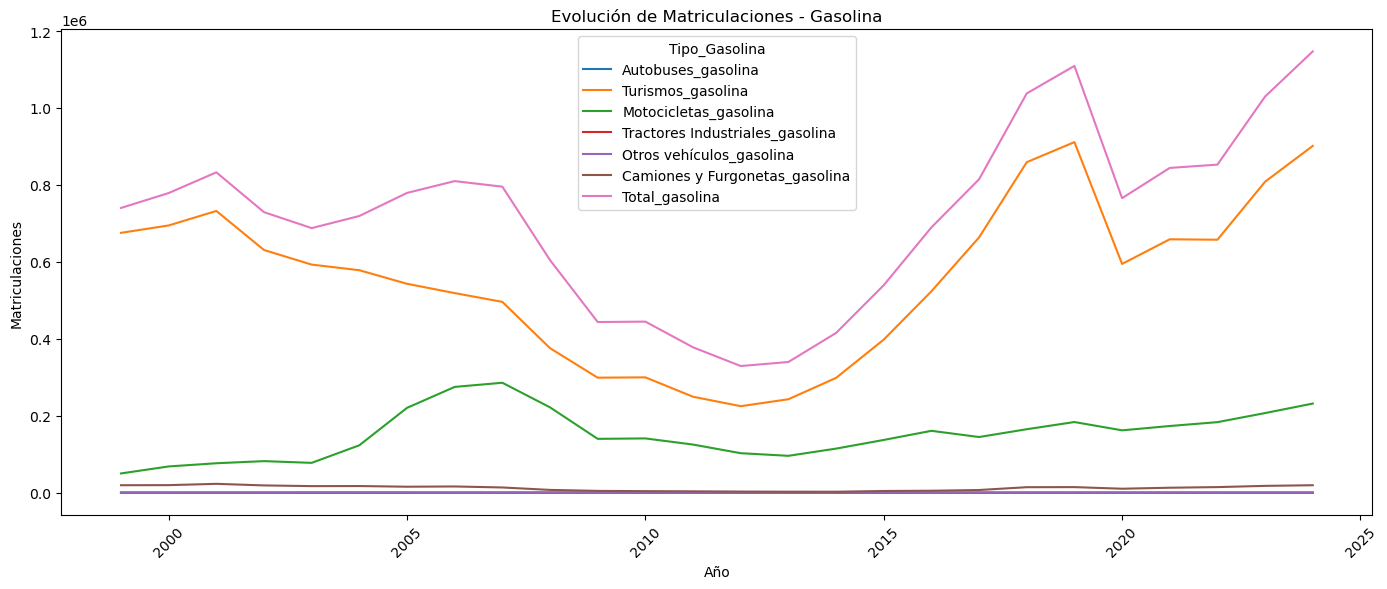

C:\Users\Antonio Caro\AppData\Local\Temp\ipykernel_16916\1451766389.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


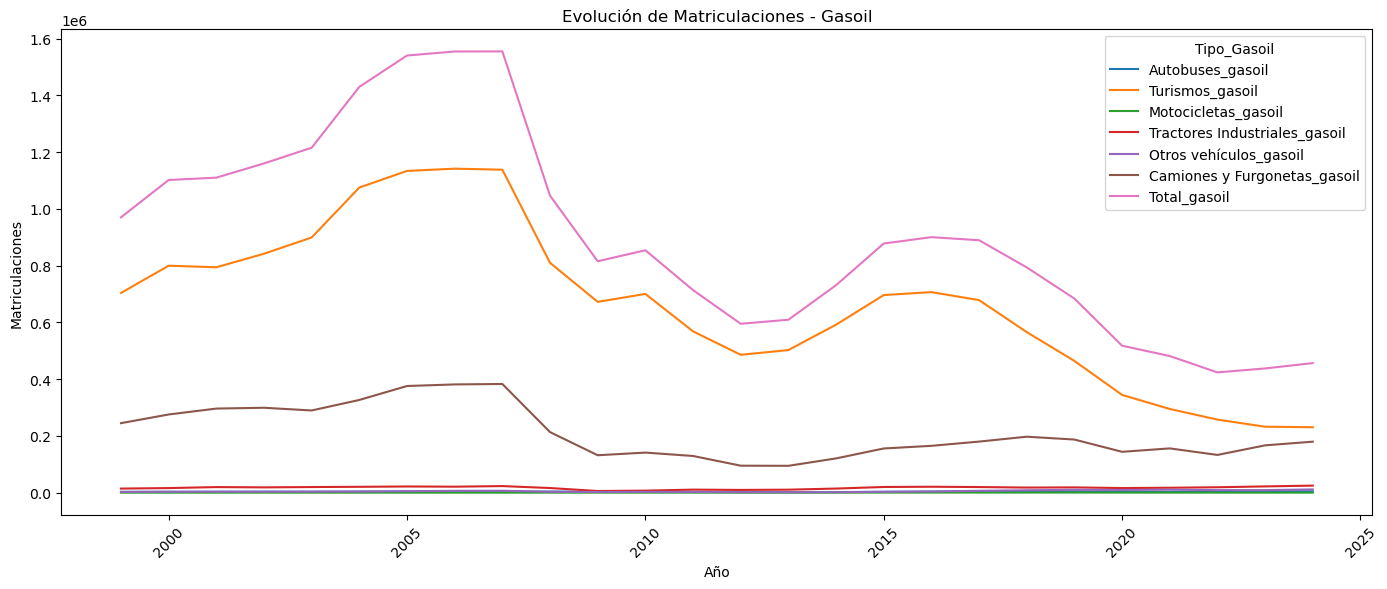

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define gasoline and diesel variable lists
gasoline_cols = [col for col in df_matriculaciones.columns if 'gasolina' in col.lower()]
diesel_cols = [col for col in df_matriculaciones.columns if 'gasoil' in col.lower()]

# Step 2: Melt data for each type
df_gasoline = df_matriculaciones.melt(
    id_vars=['Año', 'Comunidad', 'Mes'],
    value_vars=gasoline_cols,
    var_name='Tipo_Gasolina',
    value_name='Matriculaciones'
)

df_diesel = df_matriculaciones.melt(
    id_vars=['Año', 'Comunidad', 'Mes'],
    value_vars=diesel_cols,
    var_name='Tipo_Gasoil',
    value_name='Matriculaciones'
)

# Step 3: Plot gasoline-related variables
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_gasoline,
    x='Año',
    y='Matriculaciones',
    hue='Tipo_Gasolina',
    estimator='sum',
    ci=None
)
plt.title('Evolución de Matriculaciones - Gasolina')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Plot diesel-related variables
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_diesel,
    x='Año',
    y='Matriculaciones',
    hue='Tipo_Gasoil',
    estimator='sum',
    ci=None
)
plt.title('Evolución de Matriculaciones - Gasoil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### CORRELATION CHECK

In [72]:
df_matriculaciones['Año']=df_matriculaciones['Año']
df_matriculaciones['CCAA']=df_matriculaciones['Comunidad']

df_merged_year = df_merged_year.merge(df_matriculaciones, on=['CCAA', 'Año'])
df_merged_year.head()

,Año,Mes_x,CCAA,Provincia,Gasolina 97 I.O.,Gasolina 95 I.O.,Gasolina 98 I.O.,% bio en gasolinas,Gasóleo A,Gasóleo B,...,Motocicletas_gasolina,Motocicletas_gasoil,Tractores Industriales_gasolina,Tractores Industriales_gasoil,Otros vehículos_gasolina,Otros vehículos_gasoil,Camiones y Furgonetas_gasolina,Camiones y Furgonetas_gasoil,Total_gasolina,Total_gasoil
0,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,735.876387,0.884113,0.0,167.4720,0.142770,10.673130,18.168502,904.090498,3000.201602,5285.359298
1,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,723.098739,0.868761,0.0,91.9933,0.205711,15.378489,21.204223,1055.152277,3690.294715,6501.074285
2,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,1015.242246,1.219754,0.0,110.9502,0.253301,18.936199,23.552611,1172.011389,4309.765618,7592.376382
3,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,1181.816317,1.419883,0.0,106.4145,0.351552,26.281148,27.211513,1354.083587,4458.885025,7855.075275
4,2014,enero,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,1339.794515,1.609685,0.0,97.9246,0.253301,18.936199,26.235501,1305.515799,4596.928915,8098.262785


In [73]:
# Check for nulls
print(df_merged_year['Tractores Industriales_gasolina'].isna().sum())

# Check unique values
print(df_merged_year['Tractores Industriales_gasolina'].unique())


0
[0.]


In [74]:
print(df_merged_year.isna().sum())

Año                                     0
Mes_x                                   0
CCAA                                    0
Provincia                               0
Gasolina 97 I.O.                   442656
Gasolina 95 I.O.                        0
Gasolina 98 I.O.                        0
% bio en  gasolinas                     0
Gasóleo A                               0
Gasóleo B                               0
Gasóleo C                               0
% bio en  gasóleos                      0
Fuelóleo BIA                            0
Mes_normalized                          0
Date_x                                  0
region                                  0
YEAR                                    0
MUJERES                                 0
VARONES                                 0
TOTAL_POPULATION                        0
year                                    0
month                                   0
HVO                                     0
Date_y                            

In [75]:
correlation_columns = ['Gasolina 95 I.O.', 'Gasolina 98 I.O.', 'Gasóleo A', 'Gasóleo B','MUJERES','VARONES','TOTAL_POPULATION', 'Autobuses_gasolina',
 'Autobuses_gasoil',
 'Turismos_gasolina',
 'Turismos_gasoil',
 'Motocicletas_gasolina',
 'Motocicletas_gasoil',
 'Tractores Industriales_gasolina',
 'Tractores Industriales_gasoil',
 'Otros vehículos_gasolina',
 'Otros vehículos_gasoil',
 'Camiones y Furgonetas_gasolina',
 'Camiones y Furgonetas_gasoil',
 'Total_gasolina',
 'Total_gasoil']
correlation_matrix = df_merged_year[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)



                                 Gasolina 95 I.O.  Gasolina 98 I.O.  \
Gasolina 95 I.O.                         1.000000          0.620331   
Gasolina 98 I.O.                         0.620331          1.000000   
Gasóleo A                                0.910587          0.409481   
Gasóleo B                                0.614399          0.142792   
MUJERES                                  0.333101          0.064933   
VARONES                                  0.324855          0.063225   
TOTAL_POPULATION                         0.384709          0.081873   
Autobuses_gasolina                       0.410927          0.168508   
Autobuses_gasoil                         0.515198          0.202730   
Turismos_gasolina                        0.557348          0.221231   
Turismos_gasoil                          0.477597          0.210618   
Motocicletas_gasolina                    0.567995          0.215332   
Motocicletas_gasoil                      0.422981          0.206158   
Tracto

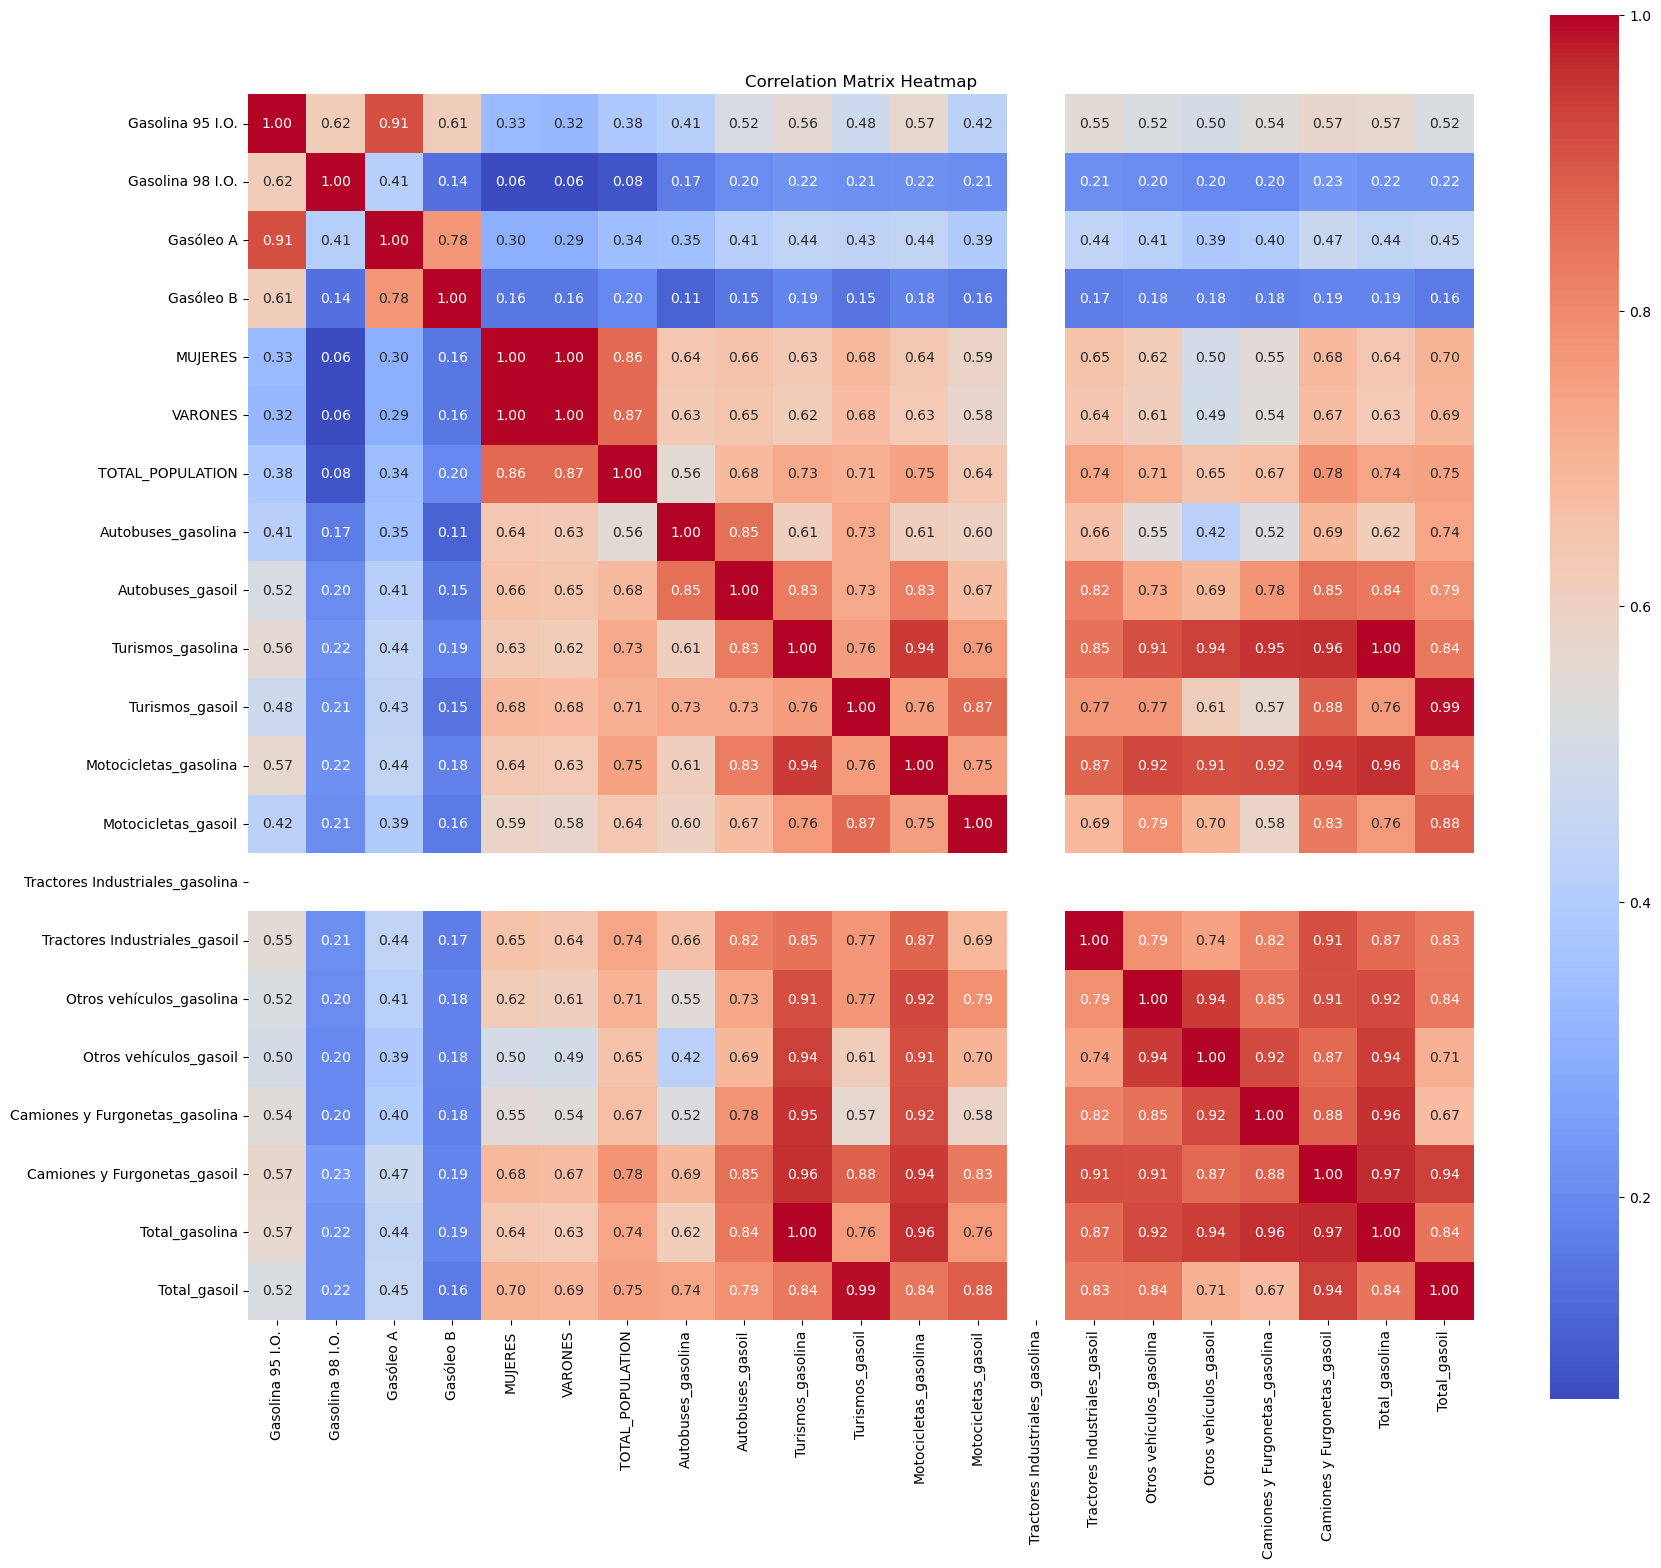

In [76]:
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## 3.-Conclusions/ highlights
This dataframe shows the number of matriculations the 1st of january each year

starting data:1999

ending data:2024

granularity: monthly

regionality: comunidad

## 4.- GDP Quarterly


### Import and consolidation

In [77]:
path='GDP_REGIONS_Quaterly.xlsx'
GDP_quarter=pd.read_excel(path, sheet_name='PIB trim CCAA', skiprows=1, usecols=range(0,18))
GDP_quarter.rename(columns={'Unnamed: 0':'period'},inplace=True)

In [78]:
# Reshape the DataFrame from wide to long format
GDP_quarter = pd.melt(
    GDP_quarter,
    id_vars='period',                # keep this column as-is
    var_name='region',              # new column for previous column names
    value_name='GDP_Q'              # new column for the values
)

# Preview the result
GDP_quarter.head()

,period,region,GDP_Q
0,200001,Andalucía,82.947446
1,200002,Andalucía,83.899312
2,200003,Andalucía,84.721814
3,200004,Andalucía,85.381961
4,200101,Andalucía,86.427170


In [79]:
# Ensure period is a string (just in case it's numeric)
GDP_quarter['period'] = GDP_quarter['period'].astype(str)

# Extract year and quarter
GDP_quarter['YEAR'] = GDP_quarter['period'].str[:4].astype(int)
GDP_quarter['quarter'] = GDP_quarter['period'].str[4:].astype(int)

GDP_quarter = GDP_quarter[['YEAR', 'quarter', 'region', 'GDP_Q']]
# Preview result
GDP_quarter.head()


,YEAR,quarter,region,GDP_Q
0,2000,1,Andalucía,82.947446
1,2000,2,Andalucía,83.899312
2,2000,3,Andalucía,84.721814
3,2000,4,Andalucía,85.381961
4,2001,1,Andalucía,86.427170


In [80]:
df_consumption['CCAA'].unique()

array(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias',
       'Cantabria', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña',
       'Ceuta', 'Comunidad Valenciana', 'Extremadura', 'Galicia',
       'La Rioja', 'Madrid', 'Melilla', 'Murcia', 'Navarra', 'País Vasco',
       'Total Nacional'], dtype=object)

In [81]:
GDP_quarter['region'].unique()

array(['Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes',
       'Canarias', 'Cantabria', 'Castilla y León', 'Castilla - La Mancha',
       'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia',
       'Madrid, Comunidad de', 'Murcia, Región de',
       'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La'],
      dtype=object)

In [82]:
import pandas as pd

# ✅ Normalize and clean region names
GDP_quarter['region'] = GDP_quarter['region'].str.strip().str.normalize('NFKC')
df_consumption['CCAA'] = df_consumption['CCAA'].str.strip().str.normalize('NFKC')

# ✅ Define mapping from GDP_quarter -> df_consumption region names
region_mapping = {
    'Asturias, Principado de': 'Asturias',
    'Balears, Illes': 'Baleares',
    'Madrid, Comunidad de': 'Madrid',
    'Murcia, Región de': 'Murcia',
    'Navarra, Comunidad Foral de': 'Navarra',
    'Rioja, La': 'La Rioja',
    'Comunitat Valenciana': 'Comunidad Valenciana',
    'Castilla - La Mancha': 'Castilla-La Mancha'
}

# ✅ Apply mapping to GDP_quarter
GDP_quarter['region'] = GDP_quarter['region'].replace(region_mapping)

# ✅ Check for any remaining unmatched regions
unmatched = set(GDP_quarter['region'].unique()) - set(df_consumption['CCAA'].unique())
print("⚠️ Unmatched regions after mapping:", unmatched)


⚠️ Unmatched regions after mapping: set()


### Basic EDA

In [83]:
GDP_quarter.head()

,YEAR,quarter,region,GDP_Q
0,2000,1,Andalucía,82.947446
1,2000,2,Andalucía,83.899312
2,2000,3,Andalucía,84.721814
3,2000,4,Andalucía,85.381961
4,2001,1,Andalucía,86.427170


In [84]:
GDP_quarter.tail()

,YEAR,quarter,region,GDP_Q
1695,2023,4,La Rioja,116.444003
1696,2024,1,La Rioja,117.673231
1697,2024,2,La Rioja,118.239224
1698,2024,3,La Rioja,119.111885
1699,2024,4,La Rioja,120.082946


In [85]:
GDP_quarter.shape

(1700, 4)

In [86]:
GDP_quarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     1700 non-null   int32  
 1   quarter  1700 non-null   int32  
 2   region   1700 non-null   object 
 3   GDP_Q    1700 non-null   float64
dtypes: float64(1), int32(2), object(1)
memory usage: 40.0+ KB


In [87]:
GDP_quarter.describe()

,YEAR,quarter,GDP_Q
count,1700.000000,1700.000000,1700.000000
mean,2012.000000,2.500000,102.636088
std,7.213224,1.118363,9.967055
min,2000.000000,1.000000,71.204032
25%,2006.000000,1.750000,96.795411
50%,2012.000000,2.500000,103.041901
75%,2018.000000,3.250000,108.880420
max,2024.000000,4.000000,144.169701


In [88]:
GDP_quarter.isnull().sum()

YEAR       0
quarter    0
region     0
GDP_Q      0
dtype: int64

In [89]:
GDP_quarter.duplicated().sum()

0

In [90]:
import pandas as pd

# Step 1: Get all unique years, quarters, and regions
all_years = GDP_quarter['YEAR'].unique()
all_quarters = GDP_quarter['quarter'].unique()
all_regions = GDP_quarter['region'].unique()

# Step 2: Create the full set of expected combinations
full_index = pd.MultiIndex.from_product(
    [all_years, all_quarters, all_regions],
    names=['YEAR', 'quarter', 'region']
)

# Step 3: Create actual index from your data
actual_index = GDP_quarter.set_index(['YEAR', 'quarter', 'region']).index

# Step 4: Identify missing combinations
missing = full_index.difference(actual_index)

# Step 5: Display result
if missing.empty:
    print("✅ No missing (YEAR, quarter, region) combinations.")
else:
    print("❌ Missing combinations found:")
    print(missing.to_frame(index=False))


✅ No missing (YEAR, quarter, region) combinations.


In [91]:
first_year = GDP_quarter['YEAR'].min()
last_year = GDP_quarter['YEAR'].max()

print(f"📅 First year in dataset: {first_year}")
print(f"📅 Last year in dataset: {last_year}")


📅 First year in dataset: 2000
📅 Last year in dataset: 2024


### data plot

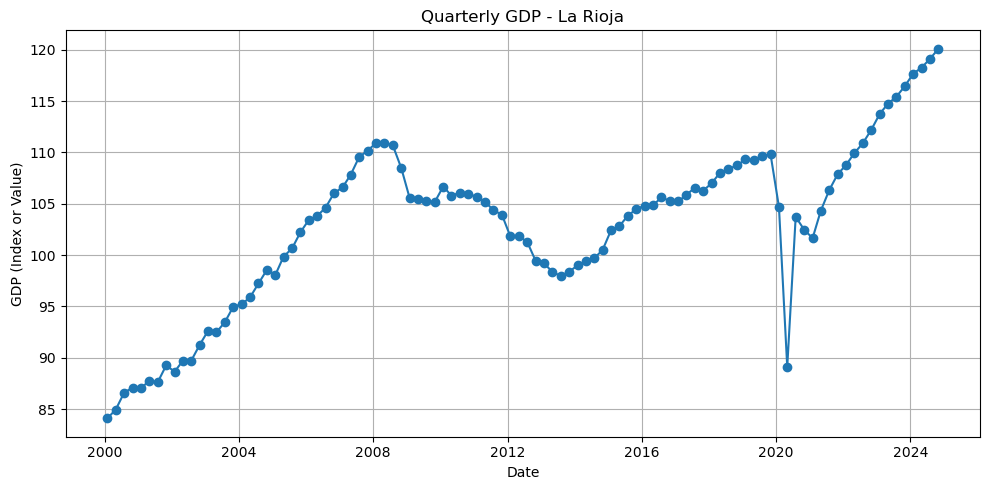

In [92]:

# Optional: Filter to a specific region (if needed)
df_plot = GDP_quarter[GDP_quarter['region'] == 'La Rioja'].copy()

# Create a datetime column using YEAR and quarter (approximate to mid-quarter)
quarter_to_month = {1: 2, 2: 5, 3: 8, 4: 11}  # Feb, May, Aug, Nov
df_plot['month'] = df_plot['quarter'].map(quarter_to_month)
df_plot['date'] = pd.to_datetime(df_plot[['YEAR', 'month']].assign(day=1))

# Sort by date
df_plot = df_plot.sort_values('date')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_plot['date'], df_plot['GDP_Q'], marker='o', linestyle='-')
plt.title('Quarterly GDP - La Rioja')
plt.xlabel('Date')
plt.ylabel('GDP (Index or Value)')
plt.grid(True)
plt.tight_layout()
plt.show()


### correlation check

In [93]:
import pandas as pd

# Step 1: Clean any duplicated columns in GDP_quarter
GDP_quarter = GDP_quarter.loc[:, ~GDP_quarter.columns.duplicated()]

# Step 2: Create 'Año' and 'CCAA' columns for merge compatibility
GDP_quarter['Año'] = GDP_quarter['YEAR']
GDP_quarter['CCAA'] = GDP_quarter['region']

# Step 3: Expand each quarter into 3 months
GDP_monthly = GDP_quarter.loc[GDP_quarter.index.repeat(3)].copy()

# Step 4: Assign correct months to each quarter
quarter_to_months = {
    1: [1, 2, 3],
    2: [4, 5, 6],
    3: [7, 8, 9],
    4: [10, 11, 12]
}
GDP_monthly['MonthIndex'] = GDP_monthly.groupby(['Año', 'CCAA', 'quarter']).cumcount()
GDP_monthly['Mes'] = GDP_monthly.apply(
    lambda row: quarter_to_months[row['quarter']][row['MonthIndex']], axis=1
)

# Step 5: Distribute GDP_Q evenly across months
GDP_monthly['GDP_month'] = GDP_monthly['GDP_Q'] / 3

# Step 6: Keep only the necessary columns for merging
GDP_monthly = GDP_monthly[['Año', 'Mes', 'CCAA', 'GDP_month']]

# Step 7: Clean df_merged_year
df_merged_year = df_merged_year.loc[:, ~df_merged_year.columns.duplicated()]
df_merged_year = df_merged_year.rename(columns={'Mes_x': 'Mes'})

# Step 8: Convert Spanish months to numbers if needed
month_map = {
    'enero': 1, 'febrero': 2, 'marzo': 3,
    'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9,
    'octubre': 10, 'noviembre': 11, 'diciembre': 12
}
if df_merged_year['Mes'].dtype == object:
    df_merged_year['Mes'] = df_merged_year['Mes'].str.lower().str.strip().map(month_map)

# Step 9: Drop extra GDP columns from df_merged_year to avoid duplicate matches
columns_to_drop = ['quarter', 'region_y', 'GDP_Q', 'YEAR_y']
df_merged_year = df_merged_year.drop(columns=[col for col in columns_to_drop if col in df_merged_year.columns])

# Step 10: Convert merge keys to correct types
df_merged_year['Año'] = df_merged_year['Año'].astype(int)
df_merged_year['Mes'] = df_merged_year['Mes'].astype(int)
df_merged_year['CCAA'] = df_merged_year['CCAA'].astype(str)
GDP_monthly['Año'] = GDP_monthly['Año'].astype(int)
GDP_monthly['Mes'] = GDP_monthly['Mes'].astype(int)
GDP_monthly['CCAA'] = GDP_monthly['CCAA'].astype(str)

# Step 11: Merge monthly GDP into the main dataframe
df_merged = pd.merge(
    df_merged_year,
    GDP_monthly,
    how='left',
    on=['Año', 'Mes', 'CCAA']
)

# ✅ Result: Show first few rows
print(df_merged[['Año', 'Mes', 'CCAA', 'GDP_month']].head())



    Año  Mes       CCAA  GDP_month
0  2014    1  Andalucía   32.57765
1  2014    1  Andalucía   32.57765
2  2014    1  Andalucía   32.57765
3  2014    1  Andalucía   32.57765
4  2014    1  Andalucía   32.57765


In [94]:

df_merged.head()

,Año,Mes,CCAA,Provincia,Gasolina 97 I.O.,Gasolina 95 I.O.,Gasolina 98 I.O.,% bio en gasolinas,Gasóleo A,Gasóleo B,...,Motocicletas_gasoil,Tractores Industriales_gasolina,Tractores Industriales_gasoil,Otros vehículos_gasolina,Otros vehículos_gasoil,Camiones y Furgonetas_gasolina,Camiones y Furgonetas_gasoil,Total_gasolina,Total_gasoil,GDP_month
0,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,0.884113,0.0,167.4720,0.142770,10.673130,18.168502,904.090498,3000.201602,5285.359298,32.57765
1,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,0.868761,0.0,91.9933,0.205711,15.378489,21.204223,1055.152277,3690.294715,6501.074285,32.57765
2,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,1.219754,0.0,110.9502,0.253301,18.936199,23.552611,1172.011389,4309.765618,7592.376382,32.57765
3,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,1.419883,0.0,106.4145,0.351552,26.281148,27.211513,1354.083587,4458.885025,7855.075275,32.57765
4,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,1.609685,0.0,97.9246,0.253301,18.936199,26.235501,1305.515799,4596.928915,8098.262785,32.57765


In [95]:
correlation_columns = ['Gasolina 95 I.O.', 'Gasolina 98 I.O.', 'Gasóleo A', 'Gasóleo B','MUJERES','VARONES','TOTAL_POPULATION', 'Autobuses_gasolina',
 'Autobuses_gasoil',
 'Turismos_gasolina',
 'Turismos_gasoil',
 'Motocicletas_gasolina',
 'Motocicletas_gasoil',
 'Tractores Industriales_gasolina',
 'Tractores Industriales_gasoil',
 'Otros vehículos_gasolina',
 'Otros vehículos_gasoil',
 'Camiones y Furgonetas_gasolina',
 'Camiones y Furgonetas_gasoil',
 'Total_gasolina',
 'Total_gasoil','GDP_month']
correlation_matrix = df_merged[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)



                                 Gasolina 95 I.O.  Gasolina 98 I.O.  \
Gasolina 95 I.O.                         1.000000          0.620331   
Gasolina 98 I.O.                         0.620331          1.000000   
Gasóleo A                                0.910587          0.409481   
Gasóleo B                                0.614399          0.142792   
MUJERES                                  0.333101          0.064933   
VARONES                                  0.324855          0.063225   
TOTAL_POPULATION                         0.384709          0.081873   
Autobuses_gasolina                       0.410927          0.168508   
Autobuses_gasoil                         0.515198          0.202730   
Turismos_gasolina                        0.557348          0.221231   
Turismos_gasoil                          0.477597          0.210618   
Motocicletas_gasolina                    0.567995          0.215332   
Motocicletas_gasoil                      0.422981          0.206158   
Tracto

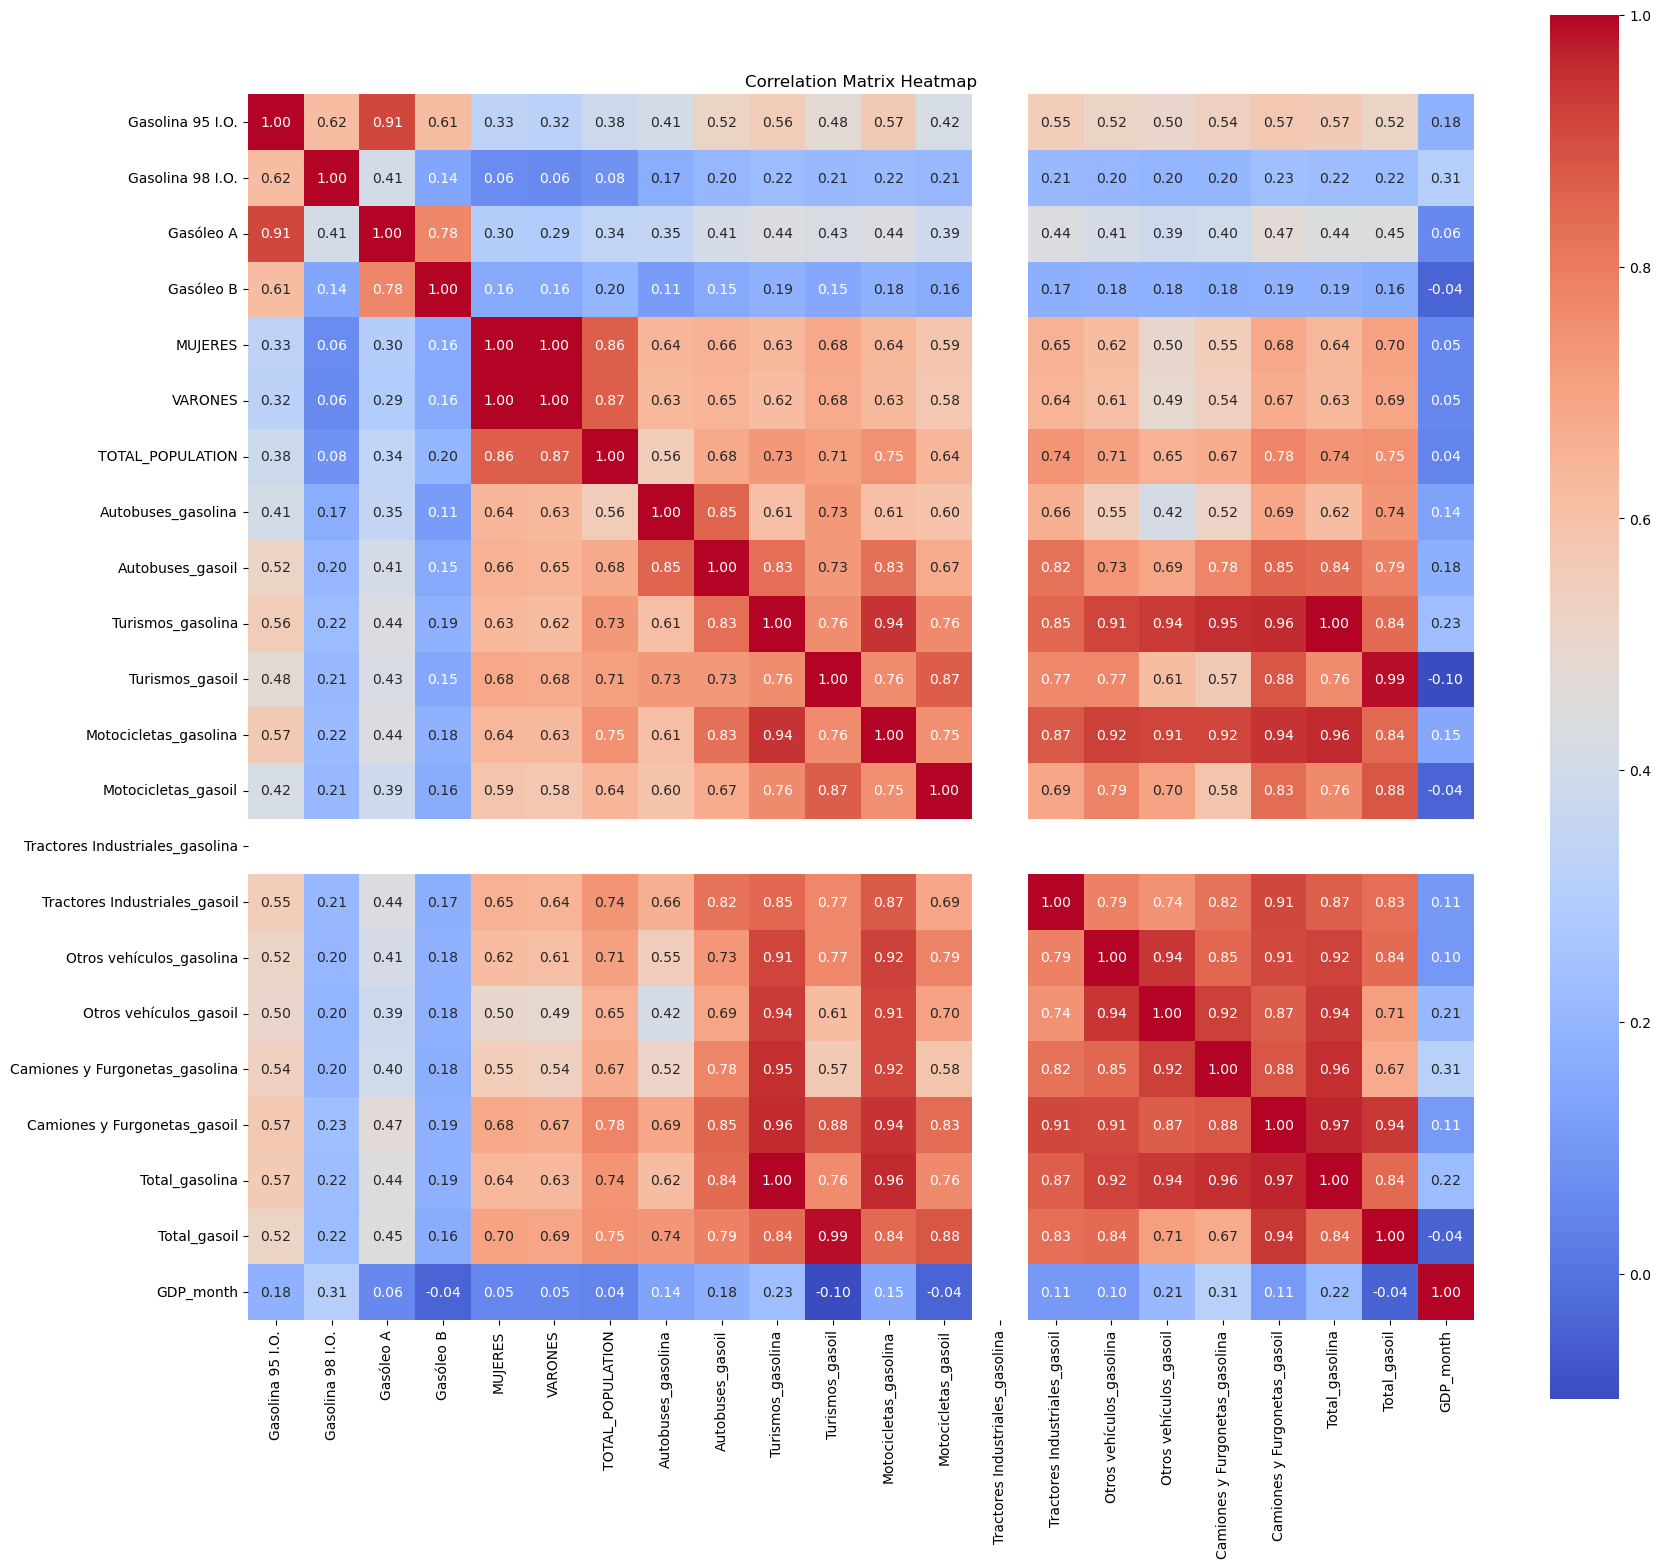

In [96]:
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## 4.- Conclusion/ highlight
This dataframe shows the quarterly GDP in Spain.

starting data:2000

ending data:2024

granularutry: quarterly

regionality: comunidad(region)

## 5.- prices

### Import and consolidation

In [97]:
import pandas as pd

# Mapeo de nombres de regiones
price_to_ccaa = {
    'Toda España':              'España',
    'Andalucia':                'Andalucía',
    'Aragon':                   'Aragón',
    'Asturias':                 'Asturias',
    'Baleares':                 'Baleares',
    'Canarias':                 'Canarias',
    'Cantabria':                'Cantabria',
    'Castilla la Mancha':       'Castilla-La Mancha',
    'Castilla y León':          'Castilla y León',
    'Cataluña':                 'Cataluña',
    'Comunidad Valencia':       'Comunidad Valenciana',
    'Extremadura':              'Extremadura',
    'Galicia':                  'Galicia',
    'Madrid':                   'Madrid',
    'Murcia':                   'Murcia',
    'Navarra':                  'Navarra',
    'País Vasco':               'País Vasco',
    'Rioja (La)':               'La Rioja',
    'Ceuta':                    'Ceuta',
    'Melilla':                  'Melilla'
}

# Función para procesar cada DataFrame
def prep_price_df(df_price: pd.DataFrame, product_name: str) -> pd.DataFrame:
    df = df_price.reset_index()
    drop_cols = [c for c in df.columns if c.lower().startswith('toda espa')]
    df = df.drop(columns=drop_cols, errors='ignore')
    df = df.rename(columns=price_to_ccaa)
    df_long = df.melt(id_vars=['Fecha'], var_name='CCAA', value_name='Precio')
    df_long['Period'] = pd.to_datetime(df_long['Fecha']).dt.to_period('M').dt.to_timestamp()
    df_long['Product'] = product_name
    return df_long[['Period', 'CCAA', 'Product', 'Precio']]

# Carga de archivos desde el mismo directorio
precios_diesel_A     = pd.read_excel('Prices_Gasoleo_A.xlsx', index_col='Fecha').fillna(0)
precios_diesel_B     = pd.read_excel('Prices_Gasoleo_B.xlsx', index_col='Fecha').fillna(0)
precios_gasolina_95  = pd.read_excel('Prices_Gasoline_95.xlsx', index_col='Fecha').fillna(0)
precios_gasolina_98  = pd.read_excel('Prices_Gasoline_98.xlsx', index_col='Fecha').fillna(0)

# Procesamiento individual
gas_long_95 = prep_price_df(precios_gasolina_95, 'Gasolina 95')
gas_long_98 = prep_price_df(precios_gasolina_98, 'Gasolina 98')
die_long_A  = prep_price_df(precios_diesel_A,    'Diesel A')
die_long_B  = prep_price_df(precios_diesel_B,    'Diesel B')

# Unir todos los productos en un único DataFrame
df_precios = pd.concat([gas_long_95, gas_long_98, die_long_A, die_long_B], ignore_index=True)

# ✅ Resultado final
print(df_precios.head())



      Period       CCAA      Product    Precio
0 2007-01-01  Andalucía  Gasolina 95  0.938365
1 2007-02-01  Andalucía  Gasolina 95  0.942685
2 2007-03-01  Andalucía  Gasolina 95  0.988876
3 2007-04-01  Andalucía  Gasolina 95  1.027607
4 2007-05-01  Andalucía  Gasolina 95  1.069402


In [98]:
df_precios['region']=df_precios['CCAA']
df_precios['prices']=df_precios['Precio']

In [99]:
price=df_precios

### BASIC EDA

In [100]:
price.head()

,Period,CCAA,Product,Precio,region,prices
0,2007-01-01,Andalucía,Gasolina 95,0.938365,Andalucía,0.938365
1,2007-02-01,Andalucía,Gasolina 95,0.942685,Andalucía,0.942685
2,2007-03-01,Andalucía,Gasolina 95,0.988876,Andalucía,0.988876
3,2007-04-01,Andalucía,Gasolina 95,1.027607,Andalucía,1.027607
4,2007-05-01,Andalucía,Gasolina 95,1.069402,Andalucía,1.069402


In [101]:
price.tail()

,Period,CCAA,Product,Precio,region,prices
16237,2024-12-01,La Rioja,Diesel B,1.091920,La Rioja,1.091920
16238,2025-01-01,La Rioja,Diesel B,1.140243,La Rioja,1.140243
16239,2025-02-01,La Rioja,Diesel B,1.159772,La Rioja,1.159772
16240,2025-03-01,La Rioja,Diesel B,1.132479,La Rioja,1.132479
16241,2025-04-01,La Rioja,Diesel B,1.092584,La Rioja,1.092584


In [102]:
price.shape

(16242, 6)

In [103]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Period   16242 non-null  datetime64[ns]
 1   CCAA     16242 non-null  object        
 2   Product  16242 non-null  object        
 3   Precio   16242 non-null  float64       
 4   region   16242 non-null  object        
 5   prices   16242 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 761.5+ KB


In [104]:
price.describe()

,Period,Precio,prices
count,16242,16242.000000,16242.000000
mean,2016-02-07 12:56:28.548208384,1.179072,1.179072
min,2007-01-01 00:00:00,0.000000,0.000000
25%,2011-07-01 00:00:00,0.982228,0.982228
50%,2016-02-01 00:00:00,1.197566,1.197566
75%,2020-09-01 00:00:00,1.393031,1.393031
max,2025-04-01 00:00:00,2.333203,2.333203
std,NaN,0.351961,0.351961


In [105]:
price.isnull().sum()

Period     0
CCAA       0
Product    0
Precio     0
region     0
prices     0
dtype: int64

In [106]:
price.duplicated().sum()

0

In [107]:
first_year = price.index.min()
last_year = price.index.max()

print(f"📅 First period in dataset: {first_year}")
print(f"📅 Last period in dataset: {last_year}")


📅 First period in dataset: 0
📅 Last period in dataset: 16241


### data plot

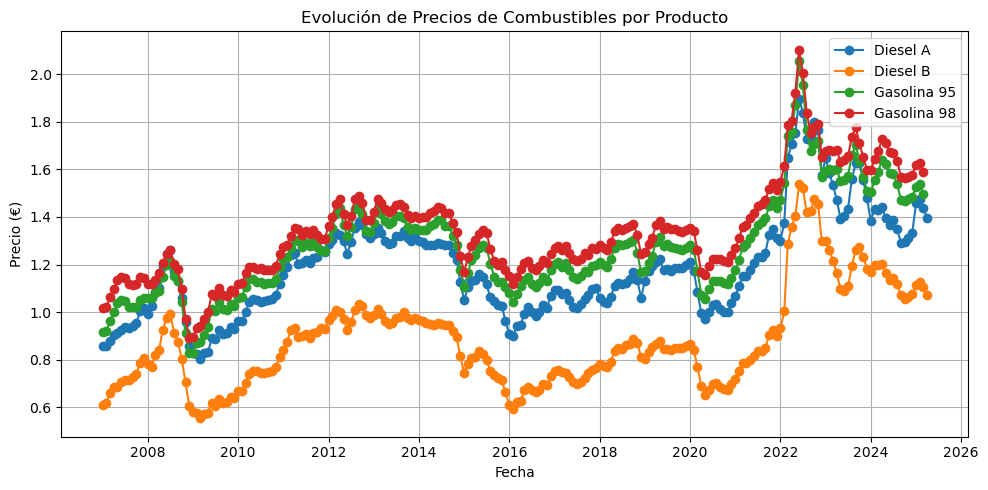

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la columna Period sea datetime
price['Period'] = pd.to_datetime(price['Period'])

# Pivotear: cada producto como una columna
df_prices_wide = price.pivot_table(
    index='Period',
    columns='Product',  # ✅ usar 'Product' con mayúscula
    values='prices'
).reset_index()

# Limpiar el nombre del índice de columnas
df_prices_wide.columns.name = None

# Graficar los precios por producto
plt.figure(figsize=(10, 5))

for product in df_prices_wide.columns[1:]:  # Ignorar 'Period'
    plt.plot(df_prices_wide['Period'], df_prices_wide[product], label=product, marker='o')

plt.title('Evolución de Precios de Combustibles por Producto')
plt.xlabel('Fecha')
plt.ylabel('Precio (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### correlation check


In [109]:
# Convert 'period' to datetime
price['Period'] = pd.to_datetime(price['Period'], format='%Y-%m')
price['CCAA']=price['region']
# Extract year and month into separate columns
price['Año'] = price['Period'].dt.year
price['Mes'] = price['Period'].dt.month


In [110]:
# Pivot the DataFrame so each product becomes its own column
df_prices_pivot = price.pivot_table(
    index=['Año', 'Mes', 'CCAA'],
    columns='Product',
    values='prices'
).reset_index()

# Optional: flatten column names if needed
df_prices_pivot.columns.name = None  # remove the column index name


In [111]:
print(df_prices_pivot.columns.tolist())

['Año', 'Mes', 'CCAA', 'Diesel A', 'Diesel B', 'Gasolina 95', 'Gasolina 98']


In [112]:

df_merged_year = df_merged.merge(df_prices_pivot, on=['Mes', 'Año','CCAA'])
df_merged_year.head()



,Año,Mes,CCAA,Provincia,Gasolina 97 I.O.,Gasolina 95 I.O.,Gasolina 98 I.O.,% bio en gasolinas,Gasóleo A,Gasóleo B,...,Otros vehículos_gasoil,Camiones y Furgonetas_gasolina,Camiones y Furgonetas_gasoil,Total_gasolina,Total_gasoil,GDP_month,Diesel A_y,Diesel B_y,Gasolina 95,Gasolina 98
0,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,10.673130,18.168502,904.090498,3000.201602,5285.359298,32.57765,1.360689,1.017496,1.417528,1.536366
1,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,15.378489,21.204223,1055.152277,3690.294715,6501.074285,32.57765,1.360689,1.017496,1.417528,1.536366
2,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,18.936199,23.552611,1172.011389,4309.765618,7592.376382,32.57765,1.360689,1.017496,1.417528,1.536366
3,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,26.281148,27.211513,1354.083587,4458.885025,7855.075275,32.57765,1.360689,1.017496,1.417528,1.536366
4,2014,1,Andalucía,Almería,NaN,3384.35,186.04,0.082324,28752.7,5206.6,...,18.936199,26.235501,1305.515799,4596.928915,8098.262785,32.57765,1.360689,1.017496,1.417528,1.536366


In [113]:
df_merged_year.isna().sum()

Año                                     0
Mes                                     0
CCAA                                    0
Provincia                               0
Gasolina 97 I.O.                   442656
Gasolina 95 I.O.                        0
Gasolina 98 I.O.                        0
% bio en  gasolinas                     0
Gasóleo A                               0
Gasóleo B                               0
Gasóleo C                               0
% bio en  gasóleos                      0
Fuelóleo BIA                            0
Mes_normalized                          0
Date_x                                  0
region                                  0
YEAR                                    0
MUJERES                                 0
VARONES                                 0
TOTAL_POPULATION                        0
year                                    0
month                                   0
HVO                                     0
Date_y                            

In [114]:
correlation_columns = ['Gasolina 95 I.O.', 'Gasolina 98 I.O.', 'Gasóleo A', 'Gasóleo B','MUJERES','VARONES','TOTAL_POPULATION', 'Autobuses_gasolina',
 'Autobuses_gasoil',
 'Turismos_gasolina',
 'Turismos_gasoil',
 'Motocicletas_gasolina',
 'Motocicletas_gasoil',
 'Tractores Industriales_gasolina',
 'Tractores Industriales_gasoil',
 'Otros vehículos_gasolina',
 'Otros vehículos_gasoil',
 'Camiones y Furgonetas_gasolina',
 'Camiones y Furgonetas_gasoil',
 'Total_gasolina',
 'Total_gasoil','GDP_month','Diesel A', 'Diesel B', 'Gasolina 95', 'Gasolina 98']
correlation_matrix = df_merged_year[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


KeyError: "['Diesel A', 'Diesel B'] not in index"

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## 5.- conclusion/ highlights
This dataframe shows the prices of the different products of study

starting data:2007

ending data:2025

granularutry: monthly

regionality: comunidad(region)
